In [2]:
import util
import graficos
import func 

In [3]:
import pandas as pd
import numpy as np
from io import StringIO
import astroquery
from astroquery.sdss import SDSS
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import time
import seaborn as sns
from scipy.integrate import quad
import matplotlib.patches as patches
import shutil
import zipfile
import os
import imageio
import matplotlib.patches as mpatches


from sklearn.cluster import DBSCAN

pd.set_option('display.max_columns', None)

In [4]:
merged_df_filtered_SN2 = pd.read_csv('lineas_filtradas_SN2.csv')

merged_df_filtered_SN2

targetObjId            specObjId              plateID targetType  \
0     11557302279471150  1890442071513262080  1890385996420245504    SCIENCE   
1     11275376875274305  1515512174368286720  1515461321955502080    SCIENCE   
2     11557227673288870  1849999284963928064  1849853599673247744    SCIENCE   
3     11275376881762458  1523417392472942592  1523342625682253824    SCIENCE   
4     11557227126063168  2246201432648738816  2246170371445254144    SCIENCE   
...                 ...                  ...                  ...        ...   
7062   5645443537305699  1488512841194432512  1488439723671185408    SCIENCE   
7063  11556959746195664  1882603658336561152  1882504702290061312    SCIENCE   
7064  11556973179633803  2030104529202079744  2029997601696278528    SCIENCE   
7065  11275494439256188  1634949103702009856  1634806716946212864    SCIENCE   
7066  11275494969114675  1615838490153478144  1615666416583731200    SCIENCE   

         platerun    mjd  fiberId  plate  tile         ra        dec  \
0     dr2003.12.1  53149      204   1679  1184  232.89301  39.887223   
1     dr2003.05.1  52822      185   1346   995  209.70949  41.751296   
2     dr2003.11.3  53143      530   1643  1155  213.91326  37.371322   
3     dr2003.05.1  53083      272   1353  1002  227.21399  36.040940   
4     dr2004.09.4  53415      113   1995  1451  183.63050  40.484059   
...           ...    ...      ...    ...   ...        ...        ...   
7062  dr2003.04.1  52791      266   1322   952  204.85104  55.086505   
7063  dr2003.12.1  53460      360   1672  1177  212.20213  48.893125   
7064  dr2004.04.1  54152      389   1803  1342  205.27873   7.218065   
7065  dr2003.07.3  53112      518   1452  1040  186.89100  42.959388   
7066  dr2003.07.3  52996      626   1435  1031  165.21784  41.675553   

           subClass     rChi2  velDispZ  velDispErr    velDisp  snMedian  \
0         STARBURST  2.759871         0   20.199030   13.20125  20.68994   
1         STARBURST  6.153744         0   21.478930   20.46089  19.66992   
2         STARBURST  2.737305         0   14.462620  141.39130  21.10927   
3         STARBURST  1.530576         0   24.901400   12.71194  13.83554   
4     AGN BROADLINE  4.901382         0    9.189864  198.56140  28.27523   
...             ...       ...       ...         ...        ...       ...   
7062    STARFORMING  1.001258         0    7.899766  135.04240  17.40931   
7063    STARFORMING  1.549534         0   12.941470   41.08393  18.10905   
7064    STARFORMING  1.797174         0    8.159815  114.82750  24.25385   
7065    STARFORMING  1.161096         0    7.691374   62.56961  19.29711   
7066      STARBURST  2.062655         0    9.308581   73.32000  25.36990   

      snMedian_u  snMedian_g  snMedian_i  snMedian_r  snMedian_z     err_u  \
0       7.169607    19.48144    23.68311    24.57376    13.48847  0.016954   
1       6.844073    18.97459    21.65471    22.72266    12.02489  0.014957   
2       6.961064    19.57236    25.76343    25.19413    15.30732  0.018603   
3       4.518486    12.68413    16.56860    16.78336     9.23776  0.026676   
4       6.422857    22.33632    36.29483    34.40255    24.74579  0.020640   
...          ...         ...         ...         ...         ...       ...   
7062    2.036815    11.81672    26.28262    23.29688    17.69760  0.031489   
7063    5.028393    14.73373    25.84910    24.30144    16.02916  0.018459   
7064    5.388490    19.28790    32.62770    31.34157    21.09497  0.031762   
7065    4.713892    16.23273    24.20513    23.75086    15.08760  0.030663   
7066    8.889151    23.19151    29.89760    30.45005    19.73465  0.017921   

         err_g     err_r     err_i     err_z   dered_u   dered_g   dered_r  \
0     0.005013  0.004761  0.005174  0.012442  18.11242  17.24763  16.94011   
1     0.004230  0.004433  0.004760  0.011518  17.95212  17.03340  16.89958   
2     0.004356  0.004023  0.004231  0.010717  17.89254  16.98387  16.54391   
3     0.005647  0.005766

In [5]:
df_Indices = pd.read_csv('Indices.csv')
df_Indices

lick_ca4227  lick_ca4227_err  lick_g4300  lick_g4300_err  lick_fe4383  \
0          1.327702         0.216299    4.195381        0.364709     5.423168   
1          1.412126         0.485733    5.263251        0.795239     4.025630   
2          0.571413         0.467203    3.002012        0.803504     3.212883   
3          0.692245         0.331389    3.831797        0.533347     3.074297   
4          0.983145         0.433930    1.967393        0.783906     2.500849   
...             ...              ...         ...             ...          ...   
251664     1.685593         0.346689    4.632662        0.531249     4.296846   
251665     1.292644         0.479365    1.266187        0.895834     3.659511   
251666     1.388089         0.225448    5.469865        0.336677     5.351321   
251667     1.194425         0.350102    4.915132        0.579437     4.847361   
251668     1.573902         0.288153    5.788447        0.441884     5.888994   

        lick_fe4383_err   lick_hb  lick_hb_err  lick_mg1  lick_mg1_err  \
0              0.373324  0.599175     0.262325  0.072771      0.006023   
1              0.824273  1.397240     0.531852  0.074743      0.012628   
2              0.838476  0.499564     0.611014  0.006144      0.014149   
3              0.561742 -0.298053     0.392078  0.089912      0.009643   
4              0.812322 -1.827891     0.615901  0.041767      0.013242   
...                 ...       ...          ...       ...           ...   
251664         0.561282  1.317967     0.397238  0.061571      0.009600   
251665         0.857127  0.918626     0.602196  0.032724      0.013717   
251666         0.358308  2.315507     0.258658  0.095388      0.006483   
251667         0.597184  0.707698     0.461760  0.084536      0.012356   
251668         0.478773  1.945047     0.342919  0.130901      0.008866   

        lick_mg2  lick_mg2_err  lick_mgb  lick_mgb_err  lick_fe5270  \
0       0.188023      0.008070  3.093462      0.253009     2.580970   
1       0.168499      0.016986  3.325200      0.531992     4.686016   
2       0.105789      0.019276  2.336600      0.627297     1.207095   
3       0.208174      0.013629  2.244275      0.381129     2.256121   
4       0.138225      0.018019  2.154121      0.595268     7.994786   
...          ...           ...       ...           ...          ...   
251664  0.174360      0.013516  3.171219      0.429568     1.858198   
251665  0.142191      0.019208  2.333075      0.627103     1.741818   
251666  0.210630      0.008693  3.465807      0.269767     3.145732   
251667  0.222795      0.015027  4.215998      0.435011     2.706025   
251668  0.278444      0.012044  4.576268      0.368326     3.277356   

        lick_fe5270_err  lick_fe5335  lick_fe5335_err  lick_nad  lick_nad_err  \
0              0.266703     2.438880         0.266427  3.083357      0.186849   
1              1.573709     2.237012         0.556086  3.320385      0.348107   
2              2.267060     1.359700         0.679097  2.358566      0.424154   
3              0.397118    -4.742968         0.734037  2.609672      0.281599   
4              1.470930     1.557236         0.610376  3.256292      0.375358   
...                 ...          ...              ...       ...           ...   
251664         0.448961     2.648651         0.435181  2.132258      0.314186   
251665         0.631111     2.577981         0.603944  2.215485      0.441183   
251666         0.281499     2.686090         0.282287  3.344061      0.216351   
251667         0.445480     1.390909         0.445600  2.233714      0.337820   
251668         0.409662     3.744372         0.388071  4.105278      0.260676   

        lick_tio1  lick_tio1_err  lick_tio2  lick_tio2_err  dtt_caii8498  \
0        0.035178       0.005675   0.054679       0.004742      1.676666   
1        0.039902       0.010642   0.058305       0.007751      0.000000   
2        0.007813       0.012479   0.047790       0.009124      0.000000   
3        0.01738

In [6]:
#Subgrupo de galaxias segun criterios de filtrado de las lineas 
filtered_Indices = df_Indices[df_Indices['specObjId'].isin(merged_df_filtered_SN2['specObjId'])]
#filtered_Indices = pd.merge(merged_df_filtered_SN2, df_Indices, on='specObjId') #filtered lines by SN>5

filtered_Indices

lick_ca4227  lick_ca4227_err  lick_g4300  lick_g4300_err  lick_fe4383  \
8         -0.060077         0.371016    1.135744        0.592685     2.005194   
68         0.280509         0.473782    2.647609        0.816678     3.225900   
70        -0.131624         0.296710   -0.372174        0.522825     1.995417   
84         0.914846         0.392687    0.746058        0.667913     1.686014   
112        1.139202         0.355534    2.065207        0.605978     4.646967   
...             ...              ...         ...             ...          ...   
251584     0.499931         0.294953    2.817013        0.505866     4.322372   
251587     0.139249         0.392863    3.232650        0.670714     4.393112   
251597     0.241974         0.314494    0.380196        0.541429     2.682120   
251607     0.032009         0.259829    0.351459        0.451065     3.227557   
251646     0.571546         0.313664    4.514489        0.510940     4.633845   

        lick_fe4383_err    lick_hb  lick_hb_err  lick_mg1  lick_mg1_err  \
8              0.661649  -7.267522     0.703911  0.035107      0.013092   
68             0.887441  -7.471405     0.836109  0.095668      0.015628   
70             0.555492 -38.087230     1.522985  0.082911      0.011592   
84             0.696132  -6.669047     0.675124  0.036392      0.011418   
112            0.644842  -6.236093     0.596722  0.117695      0.012206   
...                 ...        ...          ...       ...           ...   
251584         0.517319  -6.236293     0.505668  0.072333      0.010816   
251587         0.666898  -2.911502     0.556809  0.124425      0.013387   
251597         0.582393 -26.761650     1.195360  0.032348      0.012800   
251607         0.456451 -30.203540     1.111806  0.090817      0.009430   
251646         0.537178  -0.461042     0.419220  0.043289      0.009985   

        lick_mg2  lick_mg2_err  lick_mgb  lick_mgb_err  lick_fe5270  \
8       0.086980      0.018101  2.693927      0.572423     1.448019   
68      0.200776      0.023024  3.529092      0.777848     1.937315   
70      0.099871      0.016317  1.998466      0.487876     0.122176   
84      0.084873      0.015420  1.771555      0.486039     2.393240   
112     0.138808      0.016564  2.810145      0.517257     1.180462   
...          ...           ...       ...           ...          ...   
251584  0.161966      0.013446  2.859504      0.422351     2.006411   
251587  0.193044      0.016735  3.292070      0.522486     1.671383   
251597  0.045056      0.016500  2.008292      0.540609     0.953010   
251607  0.096203      0.013061  1.668353      0.393274     0.489226   
251646  0.143687      0.013316  3.243942      0.427285     2.268976   

        lick_fe5270_err  lick_fe5335  lick_fe5335_err  lick_nad  lick_nad_err  \
8              0.686080     1.349691         0.564739  1.863426      0.375496   
68             0.880796     0.748173         0.664256  2.150637      0.423204   
70             0.587492     0.000000        -1.000000  2.587084      0.404087   
84             0.488118     2.038401         0.504123  2.148531      0.358968   
112            0.674269     0.128041         0.678826  2.530452      0.344946   
...                 ...          ...              ...       ...           ...   
251584         0.465565     1.115657         0.482318  2.061262      0.314912   
251587         0.559121     2.115155         0.566988  5.063283      0.338788   
251597         0.522747     0.421803         0.592973  3.772116      0.328690   
251607         0.438141     1.248597         0.444905  3.094242      0.345924   
251646         0.450799     1.770270         0.443781  0.967127      0.355203   

        lick_tio1  lick_tio1_err  lick_tio2  lick_tio2_err  dtt_caii8498  \
8        0.011322       0.010137   0.027525       0.008464      0.000000   
68       0.017033       0.012111   0.051015       0.010142      0.000000   
70       0.018691       0.011443   0.047980       0.008832      0.000000   
84  

In [7]:
#Data frame con fotometria
data_clean_SN10 = pd.read_csv('data_clean_SN10.csv')

data_clean_SN10

targetObjId            specObjId              plateID  \
0         11275493895766188  1620254128968067072  1620170016328542208   
1         11275493896093786  1618058130090911744  1617918217236277248   
2                         0  7452592724291901440  7452331590284226560   
3         11275376875667585  1515465994879920128  1515461321955502080   
4            11928744689885   932279796354803712   932245161738528768   
...                     ...                  ...                  ...   
288785    11275376860201153  1533552140348319744  1533475724290189312   
288786  1237660963474964655  5838921971006724096  5838917023208321024   
288787    11557238380953775  2016570367610480640  2016486804726769664   
288788    11557238381019233  2016570642488387584  2016486804726769664   
288789    11557238917824514  2016583011994200064  2016486804726769664   

       targetType        platerun    mjd  fiberId  plate   tile         ra  \
0         SCIENCE     dr2003.07.3  53003      306   1439   1033  166.62199   
1         SCIENCE     dr2003.07.3  53046      509   1437   1032  167.50753   
2         SCIENCE  2012.11.a.boss  56371      950   6619  15498  195.44774   
3         SCIENCE     dr2003.05.1  52822       17   1346    995  210.84268   
4         SCIENCE     dr2002.01.1  52317      126    828    599  129.05346   
...           ...             ...    ...      ...    ...    ...        ...   
288785    SCIENCE     dr2003.05.1  53050      278   1362    978  162.73257   
288786    SCIENCE  2011.07.a.boss  56337       18   5186  13681  134.07816   
288787    SCIENCE     dr2004.04.1  54266      304   1791   1311  192.00168   
288788    SCIENCE     dr2004.04.1  54266      305   1791   1311  192.08329   
288789    SCIENCE     dr2004.04.1  54266      350   1791   1311  191.93236   

              dec     subClass     rChi2  velDispZ  velDispErr    velDisp  \
0       41.036180          NaN  1.010408         0    7.667866  245.05280   
1       41.197200          NaN  0.947584         0    8.090669  147.94990   
2       43.967623          NaN  1.081460         0    5.146191  122.64180   
3       41.543120  STARFORMING  1.057293         0    8.666488  130.19050   
4       38.392767          NaN  0.952804         0    8.149250   91.76738   
...           ...          ...       ...       ...         ...        ...   
288785  42.193826          NaN  1.080407         0    8.449068  166.04270   
288786  33.587423          NaN  0.853374         0    7.694042  232.45760   
288787   9.446562          NaN  1.493505         0    5.989486  125.66110   
288788   9.403957  STARFORMING  1.711607         0    9.969186   99.98859   
288789   9.889223          NaN  1.369374         0    3.204541  126.13310   

        snMedian  snMedian_u  snMedian_g  snMedian_i  snMedian_r  snMedian_z  \
0       26.74991    4.305839    17.91513    35.08849    33.77816    27.22397   
1       23.75638    3.724917    14.67548    35.32435    31.05552    26.44069   
2       27.99562    4.247354    20.51715    35.49090    30.59064    31.91411   
3       14.97959    2.299342    10.48679    22.01896    19.97549    13.36058   
4       15.31083    1.695766    10.62536    23.51192    21.09256    14.97507   
...          ...         ...         ...         ...         ...         ...   
288785  18.15337    0.000000    10.40759    27.02973    23.21815    17.60833   
288786  27.15416    3.320266    18.00485    35.14344    29.79602    32.05824   
288787  23.25408    3.382210    18.01252    32.66160    28.94833    20.00269   
288788  18.14431    3.323362    14.72254    25.60415    23.45540    14.87166   
288789  43.84759    8.890877    37.00220    54.57858    54.07326    42.85402   

           err_u     err_g     err_r     err_i     err_z   dered_u   dered_g  \
0       0.034436  0.004057  0.003172  0.003024  0.005866  18.66808  16.70100   
1       0.042812  0.005415  0.004313  0.004067  0.008624  19.14399  17.38373   
2       0.031879  0.003961  0.003183  0.003196  0.006313  18.08977  16.22816

In [8]:
matching_ids = data_clean_SN10[data_clean_SN10['specObjId'].isin(df_Indices['specObjId'])]

print("Matching specObjIds:")
matching_ids['specObjId']

Matching specObjIds:


0         1620254128968067072
1         1618058130090911744
3         1515465994879920128
4          932279796354803712
5          932300687075731456
                 ...         
288784    1533555164005296128
288785    1533552140348319744
288787    2016570367610480640
288788    2016570642488387584
288789    2016583011994200064
Name: specObjId, Length: 251669, dtype: uint64

# Limpieza y Filtrado SN>2

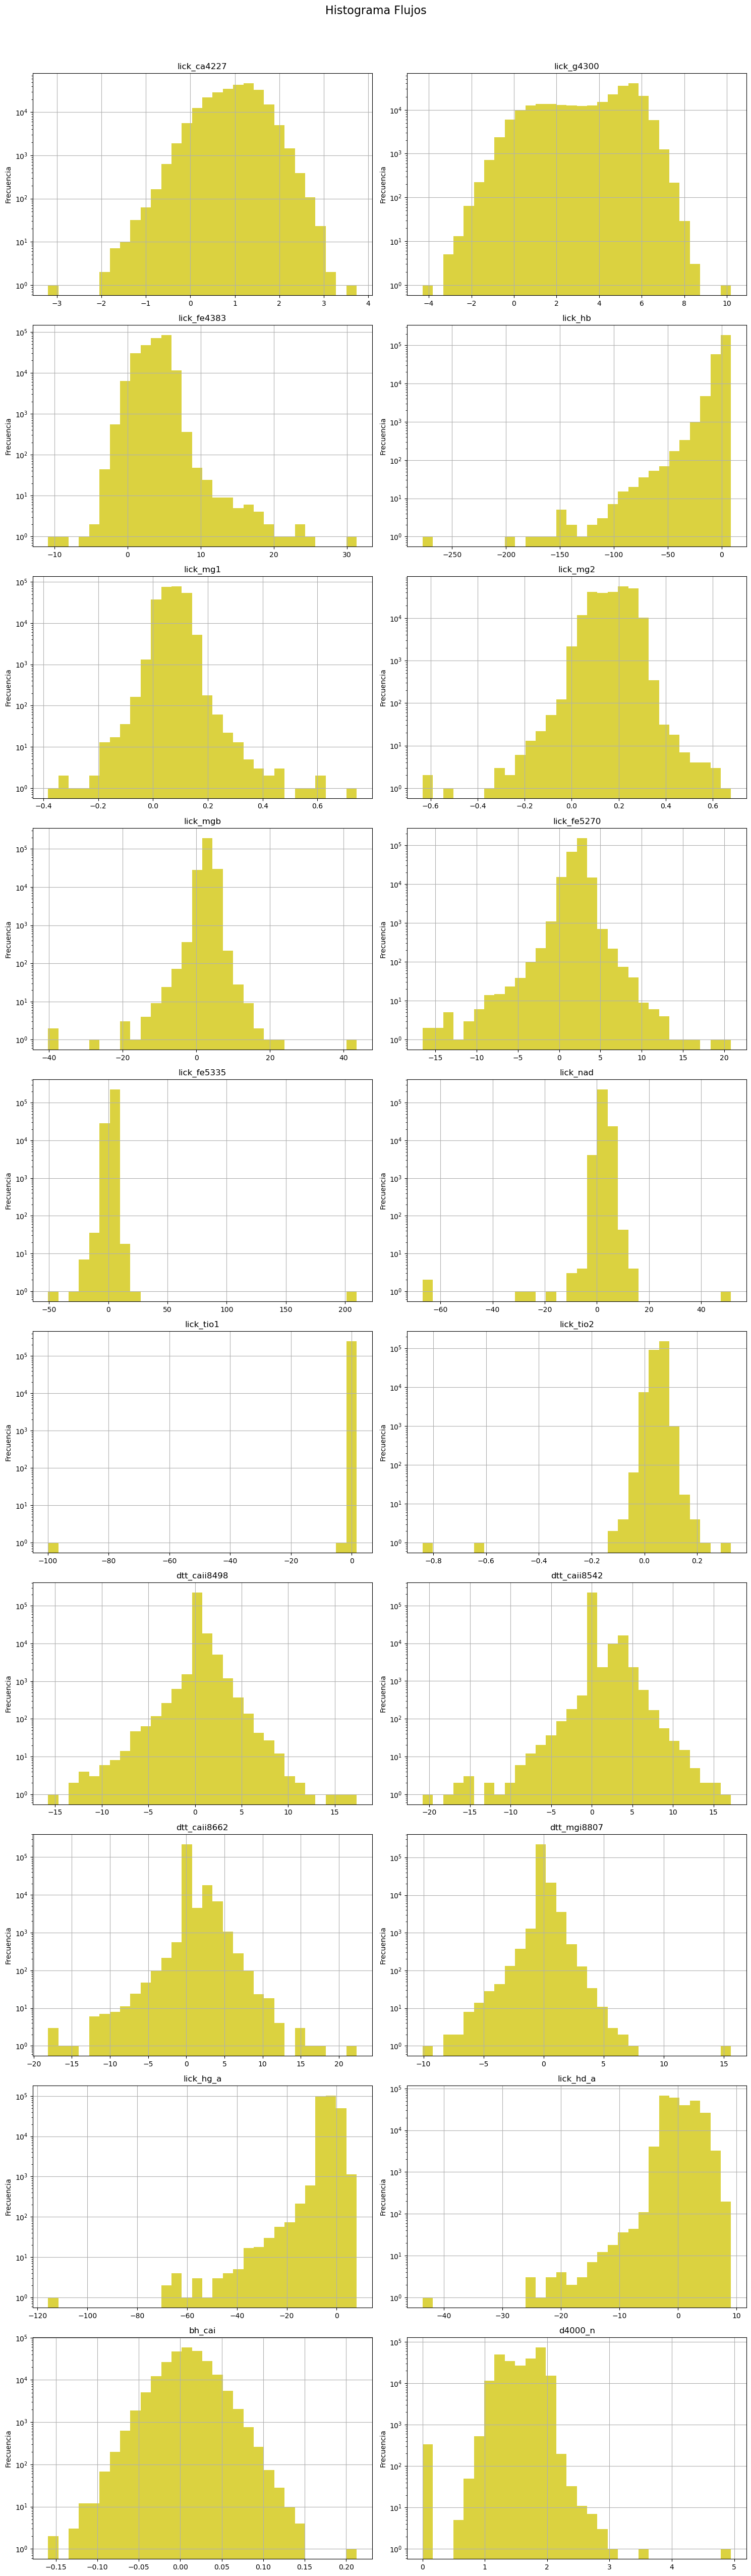

In [9]:
columns = [
    'lick_ca4227',  'lick_g4300',
    'lick_fe4383',  'lick_hb', 
    'lick_mg1',  'lick_mg2',
    'lick_mgb', 'lick_fe5270',
    'lick_fe5335', 'lick_nad',
    'lick_tio1', 'lick_tio2',
    'dtt_caii8498', 'dtt_caii8542',
    'dtt_caii8662', 'dtt_mgi8807',
    'lick_hg_a', 'lick_hd_a',
    'bh_cai', 'd4000_n'
]
									
rows = (len(columns) + 1) // 2
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()  

for i, column in enumerate(columns):
    column_data = df_Indices[column].to_numpy()

    axes[i].hist(column_data, bins=30, color='#DBD240', edgecolor=None) ##Debe hacerse el histograma del logaritmo
    axes[i].set_title(column)
    axes[i].set_yscale('log')
    #axes[i].set_xscale('log')
    axes[i].set_ylabel('Frecuencia')
    axes[i].grid(True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Histograma Flujos", y=1.02, fontsize=16)
plt.show()

/var/folders/0s/_xxgbjs554192y_2w2mspv3c0000gn/T/ipykernel_3142/2253769008.py:38: RuntimeWarning: invalid value encountered in divide
  err_rel = column_data_flux / column_data_err


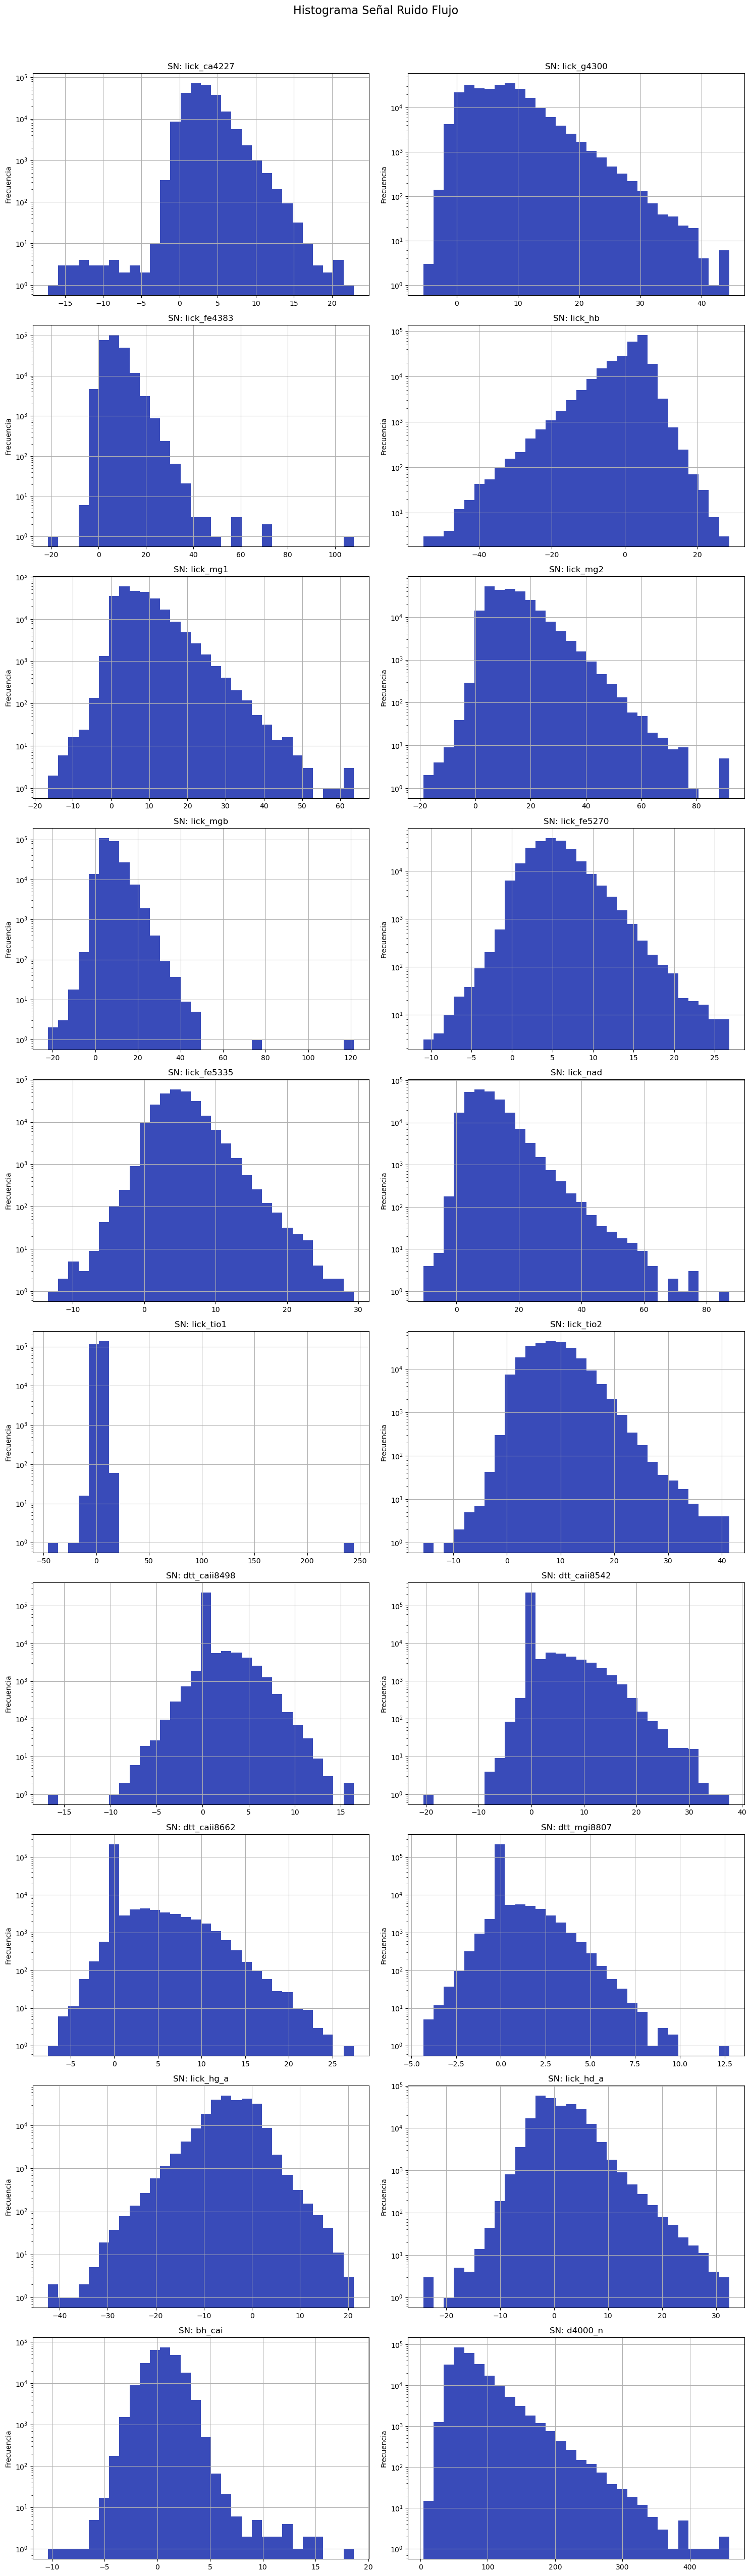

In [10]:
columns = [
    'lick_ca4227_err',  'lick_g4300_err',
    'lick_fe4383_err',  'lick_hb_err', 
    'lick_mg1_err',  'lick_mg2_err',
    'lick_mgb_err', 'lick_fe5270_err',
    'lick_fe5335_err', 'lick_nad_err',
    'lick_tio1_err', 'lick_tio2_err',
    'dtt_caii8498_err', 'dtt_caii8542_err', 
    'dtt_caii8662_err', 'dtt_mgi8807_err',
    'lick_hg_a_err', 'lick_hd_a_err',
    'bh_cai_err', 'd4000_n_err'
]

columns_1 = [
    'lick_ca4227',  'lick_g4300',
    'lick_fe4383',  'lick_hb', 
    'lick_mg1',  'lick_mg2',
    'lick_mgb', 'lick_fe5270',
    'lick_fe5335', 'lick_nad',
    'lick_tio1', 'lick_tio2',
    'dtt_caii8498', 'dtt_caii8542',
    'dtt_caii8662', 'dtt_mgi8807',
    'lick_hg_a', 'lick_hd_a',
    'bh_cai', 'd4000_n'
]

rows = (len(columns) + 1) // 2
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()  

for i, (col_err, col_flux) in enumerate(zip(columns, columns_1)):
    column_data_err = df_Indices[col_err].to_numpy()
    column_data_flux = df_Indices[col_flux].to_numpy()

    #Signal to Noise ratio
    err_rel = column_data_flux / column_data_err

    # Graficar la razón
    axes[i].hist(err_rel, bins=30, color='#394BB9', edgecolor=None)
    axes[i].set_title(f'SN: {col_flux}')
    axes[i].set_yscale('log')
    axes[i].set_ylabel('Frecuencia')
    axes[i].grid(True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Histograma Señal Ruido Flujo", y=1.02, fontsize=16)
plt.show()


### Filtro por SN


In [11]:
#signal-to-noise ratios for each line flux
sn_ratios = [df_Indices[col_flux] / df_Indices[col_err] for col_flux, col_err in zip(columns_1, columns)]

mask = np.all([sn >= 5 for sn in sn_ratios], axis=0)
mask_1 = np.all([sn >= 2 for sn in sn_ratios], axis=0)
mask_2 = np.all([sn <= 0 for sn in sn_ratios], axis=0) #Para las df_Indices de absorcion 

filtered_data_SN5 = df_Indices[mask].copy()
filtered_data_SN2 = df_Indices[mask_1].copy()
filtered_data_negativa = df_Indices[mask_2].copy()


In [12]:
filtered_data_SN2

lick_ca4227  lick_ca4227_err  lick_g4300  lick_g4300_err  lick_fe4383  \
114520     1.043675         0.110464    2.637509        0.195568     2.731611   
138141     0.980609         0.166432    3.169518        0.285980     3.099386   
165479     0.865187         0.157762    1.286732        0.271978     1.654418   

        lick_fe4383_err   lick_hb  lick_hb_err  lick_mg1  lick_mg1_err  \
114520         0.216043  3.939640     0.158622  0.045156      0.004132   
138141         0.308762  3.445679     0.192435  0.026131      0.004661   
165479         0.297599  0.502365     0.234408  0.043312      0.005470   

        lick_mg2  lick_mg2_err  lick_mgb  lick_mgb_err  lick_fe5270  \
114520  0.141247      0.005521  2.459195      0.174951     2.465176   
138141  0.108103      0.006299  2.145333      0.196918     2.541795   
165479  0.120589      0.007342  2.157151      0.233202     2.196648   

        lick_fe5270_err  lick_fe5335  lick_fe5335_err  lick_nad  lick_nad_err  \
114520         0.186332     2.395449         0.189598  4.374701      0.127270   
138141         0.199216     2.055772         0.204837  1.525360      0.147635   
165479         0.248470     2.199834         0.250060  3.043268      0.180268   

        lick_tio1  lick_tio1_err  lick_tio2  lick_tio2_err  dtt_caii8498  \
114520   0.010528       0.004106   0.040591       0.003732      1.617816   
138141   0.020805       0.004198   0.035353       0.003342      1.319597   
165479   0.020868       0.005414   0.047084       0.004672      1.406989   

        dtt_caii8498_err  dtt_caii8542  dtt_caii8542_err  dtt_caii8662  \
114520          0.185764      3.776214          0.180751      3.244100   
138141          0.223897      3.569882          0.221131      3.052432   
165479          0.282707      3.228342          0.263212      3.772932   

        dtt_caii8662_err  dtt_mgi8807  dtt_mgi8807_err  lick_hg_a  \
114520          0.203479     0.340592         0.157314   1.973964   
138141          0.269593     0.740869         0.197124   1.221761   
165479          0.286333     0.563802         0.234281   2.167423   

        lick_hg_a_err  lick_hd_a  lick_hd_a_err   d4000_n  d4000_n_err  \
114520       0.218393   4.373170       0.207427  1.591921     0.006155   
138141       0.331767   3.412481       0.347291  1.467018     0.010232   
165479       0.288643   4.839243       0.275864  1.326341     0.006558   

          bh_cai  bh_cai_err            specObjId  
114520  0.014771    0.005315  1551606121460951040  
138141  0.018089    0.007872  1874669024554543104  
165479  0.021392    0.007330  2081963814626027520

11550     0.014194
13202     0.021718
14796     0.008924
15102     0.005285
16118     0.007778
            ...   
248106    0.005526
248143    0.004412
248527    0.014625
249319    0.007763
251176    0.009520
Name: bh_cai_err, Length: 130, dtype: float64

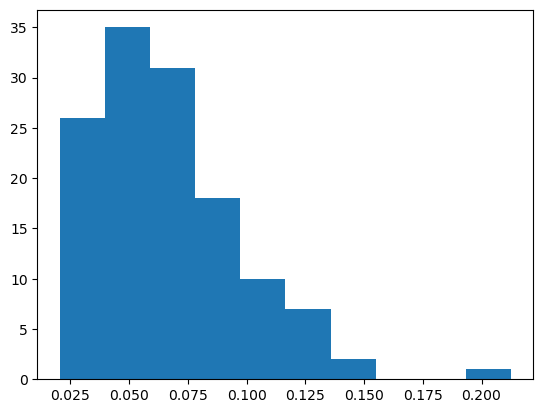

In [13]:

sn_ratio = df_Indices['bh_cai'] / df_Indices['bh_cai_err'] 

plt.hist(df_Indices['bh_cai'][sn_ratio >= 5])
df_Indices['bh_cai_err'][sn_ratio >= 5]
#df_Indices['bh_cai'][sn_ratio >= 5]

(array([   0.,    0.,    0.,    0.,    0., 1559.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

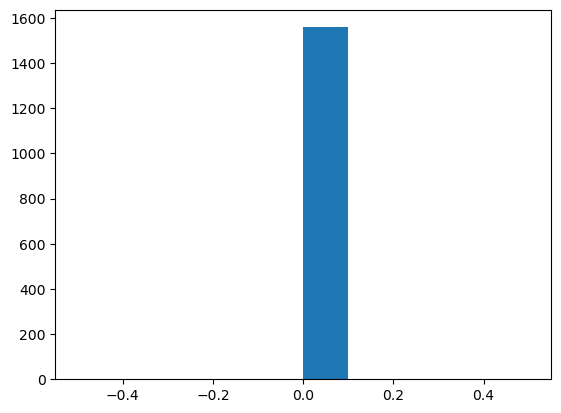

In [14]:
plt.hist(df_Indices['lick_mg1'][df_Indices['lick_mg1_err'] <0])

Dado que las columnas con indices como Hg y Hd tienen flujos negativos que afectan considerablemente la muestra, no se considerarán como índices relevantes en el proceso físico de la absorción. 

In [15]:
columnas_para_eliminar = ['lick_hg_a',
                        'lick_hg_a_err',
                        'lick_hb',
                        'lick_hb_err',	
                        'bh_cai',	
                        'bh_cai_err'
                        ]
copia = df_Indices.copy()
copia.drop(columns=columnas_para_eliminar, inplace=True)
#print(df_Indices)

In [16]:
#signal-to-noise ratios for each line flux
columns = [
    'lick_ca4227_err',  'lick_g4300_err',
    'lick_fe4383_err',  #'lick_hb_err', 
    'lick_mg1_err',  'lick_mg2_err',
    'lick_mgb_err', 'lick_fe5270_err',
     'lick_nad_err',
    'lick_tio1_err', 'lick_tio2_err',
    'dtt_caii8498_err', 'dtt_caii8542_err', 
    'dtt_caii8662_err', 'dtt_mgi8807_err',
    'lick_hd_a_err','d4000_n_err'
]

columns_1 = [
    'lick_ca4227',  'lick_g4300',
    'lick_fe4383',  #'lick_hb', 
    'lick_mg1',  'lick_mg2',
    'lick_mgb', 'lick_fe5270',
     'lick_nad',
    'lick_tio1', 'lick_tio2',
    'dtt_caii8498', 'dtt_caii8542',
    'dtt_caii8662', 'dtt_mgi8807',
    'lick_hd_a', 'd4000_n'
]
sn_ratios = [copia[col_flux] / copia[col_err] for col_flux, col_err in zip(columns_1, columns)]

mask = np.all([sn >= 5 for sn in sn_ratios], axis=0)
mask_1 = np.all([sn >= 2 for sn in sn_ratios], axis=0)
mask_2 = np.all([sn <= 0 for sn in sn_ratios], axis=0) #Para las copia de absorcion 

filtered_data_SN5 = copia[mask].copy()
filtered_data_SN2 = copia[mask_1].copy()
filtered_data_negativa = copia[mask_2].copy()

In [17]:
filtered_data_SN2#[copia[columns]>0] #Todas tienen errores positivos :D

lick_ca4227  lick_ca4227_err  lick_g4300  lick_g4300_err  lick_fe4383  \
0          1.327702         0.216299    4.195381        0.364709     5.423168   
29         0.634084         0.242116    1.123911        0.431162     1.043368   
89         0.949617         0.277029    3.854331        0.470634     3.618464   
172        0.964718         0.139676    2.912713        0.236686     3.844447   
351        0.703651         0.175111    1.136573        0.310898     1.866743   
...             ...              ...         ...             ...          ...   
250709     1.058560         0.200464    1.748579        0.353829     2.230676   
250791     1.324576         0.345981    2.214703        0.623254     3.754864   
250936     0.667516         0.175734    2.035598        0.295065     3.300933   
251013     1.545704         0.224699    2.948897        0.403404     3.283354   
251293     0.604238         0.278424    1.979045        0.459381     1.993628   

        lick_fe4383_err  lick_mg1  lick_mg1_err  lick_mg2  lick_mg2_err  \
0              0.373324  0.072771      0.006023  0.188023      0.008070   
29             0.460157  0.021493      0.007738  0.078393      0.010469   
89             0.483303  0.047508      0.007297  0.137690      0.009693   
172            0.255833  0.083484      0.004840  0.199986      0.006536   
351            0.321760  0.022912      0.005677  0.076397      0.007594   
...                 ...       ...           ...       ...           ...   
250709         0.385336  0.022461      0.006611  0.113985      0.008941   
250791         0.634598  0.049214      0.010632  0.145911      0.014294   
250936         0.314356  0.047358      0.005454  0.129572      0.007289   
251013         0.442380  0.044613      0.007104  0.147754      0.009609   
251293         0.503845  0.022154      0.008578  0.086225      0.011538   

        lick_mgb  lick_mgb_err  lick_fe5270  lick_fe5270_err  lick_fe5335  \
0       3.093462      0.253009     2.580970         0.266703     2.438880   
29      1.677379      0.330849     1.139458         0.351808     1.381812   
89      3.074421      0.298864     2.329116         0.312757     2.643599   
172     3.324259      0.201650     2.445121         0.216315     2.427386   
351     1.827786      0.242663     1.570713         0.259275     2.058320   
...          ...           ...          ...              ...          ...   
250709  2.132005      0.284826     1.940071         0.297068     2.163282   
250791  3.181159      0.442708     1.432914         0.480624     1.834160   
250936  2.593638      0.227801     1.856289         0.244029     2.036021   
251013  2.671443      0.303535     2.466012         0.317244     1.834268   
251293  1.987333      0.368746     2.039536         0.382505     2.034166   

        lick_fe5335_err  lick_nad  lick_nad_err  lick_tio1  lick_tio1_err  \
0              0.266427  3.083357      0.186849   0.035178       0.005675   
29             0.357156  1.921508      0.266909   0.020502       0.007618   
89             0.308253  4.269221      0.217391   0.025610       0.006560   
172            0.219489  3.035472      0.170495   0.032549       0.004961   
351            0.261080  2.381515      0.200740   0.022417       0.005806   
...                 ...       ...           ...        ...            ...   
250709         0.297440  1.299144      0.237644   0.014884       0.006443   
250791         0.472918  2.588056      0.345301   0.023639       0.009746   
250936         0.245968  3.159902      0.181357   0.021786       0.005247   
251013         0.319396  1.694124      0.242068   0.018634       0.006817   
251293         0.388643  1.812338      0.294508   0.023494       0.008410   

        lick_tio2  lick_tio2_err  dtt_caii8498  dtt_caii8498_err  \
0        0.054679       0.004742      1.676666          0.276206   
29       0.026911       0.006052      1.293427          0.484261   
89       0.047144       0.005067      1.643574          0.304668   
172      0.0

### Revisión y preparación


In [18]:
#merged_df = pd.merge(data_clean_SN10, copia, on='specObjId') #SN>2

#merged_df_filtered_SN2 = pd.merge(data_clean_SN10, filtered_data_SN2, on='specObjId') #SN>2

### Creacion columnas de color: 
#merged_df_filtered_SN2['color_gr'] = merged_df_filtered_SN2['dered_g'] - merged_df_filtered_SN2['dered_r']


In [19]:
merged_df = pd.merge(merged_df_filtered_SN2, filtered_Indices, on='specObjId') #Los indices filtrados por las lineas y mergeados con ellas

merged_df

targetObjId            specObjId              plateID targetType  \
0     11557302279471150  1890442071513262080  1890385996420245504    SCIENCE   
1     11275376875274305  1515512174368286720  1515461321955502080    SCIENCE   
2     11557227673288870  1849999284963928064  1849853599673247744    SCIENCE   
3     11275376881762458  1523417392472942592  1523342625682253824    SCIENCE   
4     11557227126063168  2246201432648738816  2246170371445254144    SCIENCE   
...                 ...                  ...                  ...        ...   
7062   5645443537305699  1488512841194432512  1488439723671185408    SCIENCE   
7063  11556959746195664  1882603658336561152  1882504702290061312    SCIENCE   
7064  11556973179633803  2030104529202079744  2029997601696278528    SCIENCE   
7065  11275494439256188  1634949103702009856  1634806716946212864    SCIENCE   
7066  11275494969114675  1615838490153478144  1615666416583731200    SCIENCE   

         platerun    mjd  fiberId  plate  tile         ra        dec  \
0     dr2003.12.1  53149      204   1679  1184  232.89301  39.887223   
1     dr2003.05.1  52822      185   1346   995  209.70949  41.751296   
2     dr2003.11.3  53143      530   1643  1155  213.91326  37.371322   
3     dr2003.05.1  53083      272   1353  1002  227.21399  36.040940   
4     dr2004.09.4  53415      113   1995  1451  183.63050  40.484059   
...           ...    ...      ...    ...   ...        ...        ...   
7062  dr2003.04.1  52791      266   1322   952  204.85104  55.086505   
7063  dr2003.12.1  53460      360   1672  1177  212.20213  48.893125   
7064  dr2004.04.1  54152      389   1803  1342  205.27873   7.218065   
7065  dr2003.07.3  53112      518   1452  1040  186.89100  42.959388   
7066  dr2003.07.3  52996      626   1435  1031  165.21784  41.675553   

           subClass     rChi2  velDispZ  velDispErr    velDisp  snMedian  \
0         STARBURST  2.759871         0   20.199030   13.20125  20.68994   
1         STARBURST  6.153744         0   21.478930   20.46089  19.66992   
2         STARBURST  2.737305         0   14.462620  141.39130  21.10927   
3         STARBURST  1.530576         0   24.901400   12.71194  13.83554   
4     AGN BROADLINE  4.901382         0    9.189864  198.56140  28.27523   
...             ...       ...       ...         ...        ...       ...   
7062    STARFORMING  1.001258         0    7.899766  135.04240  17.40931   
7063    STARFORMING  1.549534         0   12.941470   41.08393  18.10905   
7064    STARFORMING  1.797174         0    8.159815  114.82750  24.25385   
7065    STARFORMING  1.161096         0    7.691374   62.56961  19.29711   
7066      STARBURST  2.062655         0    9.308581   73.32000  25.36990   

      snMedian_u  snMedian_g  snMedian_i  snMedian_r  snMedian_z     err_u  \
0       7.169607    19.48144    23.68311    24.57376    13.48847  0.016954   
1       6.844073    18.97459    21.65471    22.72266    12.02489  0.014957   
2       6.961064    19.57236    25.76343    25.19413    15.30732  0.018603   
3       4.518486    12.68413    16.56860    16.78336     9.23776  0.026676   
4       6.422857    22.33632    36.29483    34.40255    24.74579  0.020640   
...          ...         ...         ...         ...         ...       ...   
7062    2.036815    11.81672    26.28262    23.29688    17.69760  0.031489   
7063    5.028393    14.73373    25.84910    24.30144    16.02916  0.018459   
7064    5.388490    19.28790    32.62770    31.34157    21.09497  0.031762   
7065    4.713892    16.23273    24.20513    23.75086    15.08760  0.030663   
7066    8.889151    23.19151    29.89760    30.45005    19.73465  0.017921   

         err_g     err_r     err_i     err_z   dered_u   dered_g   dered_r  \
0     0.005013  0.004761  0.005174  0.012442  18.11242  17.24763  16.94011   
1     0.004230  0.004433  0.004760  0.011518  17.95212  17.03340  16.89958   
2     0.004356  0.004023  0.004231  0.010717  17.89254  16.98387  16.54391   
3     0.005647  0.005766

In [20]:
merged_df['color_gr'] = merged_df['dered_g'] - merged_df['dered_r']


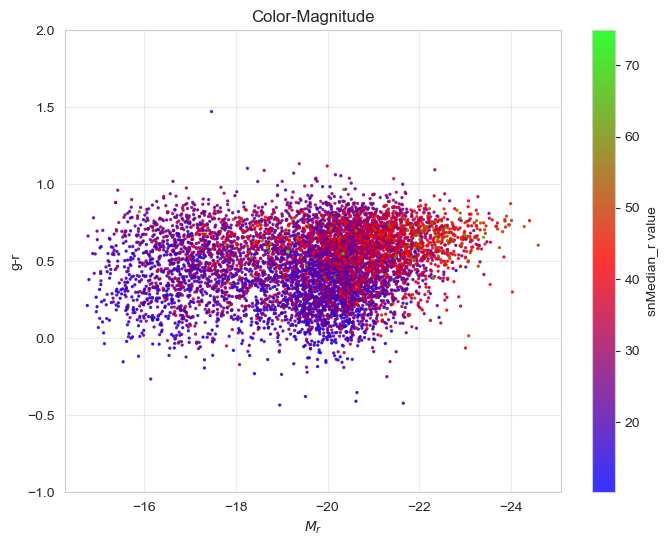

In [21]:
### chequear la fotometría
sns.set_style("whitegrid")
graficos.color_Mag(merged_df, merged_df['color_gr'], 'snMedian_r', color_map='brg')
plt.ylim(-1,2)
plt.grid(alpha=0.4)
plt.title('Color-Magnitude')
plt.gca().invert_xaxis()


### SN vs Redshift y Magnitud

In [22]:
#CORREGIR
"""
## Redshift
z_values = merged_df['z']
z_values_filtered_SN2 = merged_df_filtered_SN2['z']

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()  

for i, (col_err, col_flux) in enumerate(zip(columns, columns_1)):
    column_data_err = copia[col_err].to_numpy()
    column_data_flux = copia[col_flux].to_numpy()
    #column_data_err_filt = filtered_data[col_err].to_numpy()
    #column_data_flux_filt = filtered_data[col_flux].to_numpy()
    column_data_err_filt = filtered_data_SN2[col_err].to_numpy()
    column_data_flux_filt = filtered_data_SN2[col_flux].to_numpy()

    #SN
    err_rel = column_data_flux / column_data_err
    err_rel_filt = column_data_flux_filt / column_data_err_filt
    

    axes[i].scatter(z_values, err_rel, 
                              alpha=0.7,            
                              c=z_values,           
                              cmap='viridis',       
                              s=0.2)
    
    axes[i].scatter(z_values_filtered_SN2, err_rel_filt, 
                              alpha=0.7,            
                              c='k',             
                              s=0.7)  
    axes[i].set_title(f'{col_flux}')
    #axes[i].set_yscale('log')
    axes[i].set_ylabel('SN')
    axes[i].set_xlabel('Redshift ($z$)')
    axes[i].grid(True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Signal to Noise en función de $z$", y=1.02, fontsize=16)
plt.show()"""


'\n## Redshift\nz_values = merged_df[\'z\']\nz_values_filtered_SN2 = merged_df_filtered_SN2[\'z\']\n\nfig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))\naxes = axes.flatten()  \n\nfor i, (col_err, col_flux) in enumerate(zip(columns, columns_1)):\n    column_data_err = copia[col_err].to_numpy()\n    column_data_flux = copia[col_flux].to_numpy()\n    #column_data_err_filt = filtered_data[col_err].to_numpy()\n    #column_data_flux_filt = filtered_data[col_flux].to_numpy()\n    column_data_err_filt = filtered_data_SN2[col_err].to_numpy()\n    column_data_flux_filt = filtered_data_SN2[col_flux].to_numpy()\n\n    #SN\n    err_rel = column_data_flux / column_data_err\n    err_rel_filt = column_data_flux_filt / column_data_err_filt\n    \n\n    axes[i].scatter(z_values, err_rel, \n                              alpha=0.7,            \n                              c=z_values,           \n                              cmap=\'viridis\',       \n                              s=0.2)\n   

In [23]:
"""fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()  

for i, (col_err, col_flux) in enumerate(zip(columns, columns_1)):
    column_data_err = copia[col_err].to_numpy()
    column_data_flux = copia[col_flux].to_numpy()
    #column_data_err_filt = filtered_data[col_err].to_numpy()
    #column_data_flux_filt = filtered_data[col_flux].to_numpy()
    column_data_err_filt = filtered_data_SN2[col_err].to_numpy()
    column_data_flux_filt = filtered_data_SN2[col_flux].to_numpy()

    #SN
    err_rel = column_data_flux / column_data_err
    err_rel_filt = column_data_flux_filt / column_data_err_filt
    

    axes[i].scatter(merged_df['M_r'], err_rel, 
                              alpha=0.7,            
                              c=merged_df['M_r'],           
                              cmap="magma",      
                              s=0.2)
    axes[i].scatter(merged_df_filtered_SN2['M_r'], err_rel_filt, 
                              alpha=0.7,            
                              c='k',           
                              s=0.7) 
    axes[i].set_title(f'{col_flux}')
    #axes[i].set_yscale('log')
    axes[i].set_ylabel('SN')
    axes[i].set_xlabel('$M_r$')
    axes[i].grid(True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Signal to Noise en función de Magnitud Absoluta $M_r$", y=1.02, fontsize=16)
plt.show()"""


'fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))\naxes = axes.flatten()  \n\nfor i, (col_err, col_flux) in enumerate(zip(columns, columns_1)):\n    column_data_err = copia[col_err].to_numpy()\n    column_data_flux = copia[col_flux].to_numpy()\n    #column_data_err_filt = filtered_data[col_err].to_numpy()\n    #column_data_flux_filt = filtered_data[col_flux].to_numpy()\n    column_data_err_filt = filtered_data_SN2[col_err].to_numpy()\n    column_data_flux_filt = filtered_data_SN2[col_flux].to_numpy()\n\n    #SN\n    err_rel = column_data_flux / column_data_err\n    err_rel_filt = column_data_flux_filt / column_data_err_filt\n    \n\n    axes[i].scatter(merged_df[\'M_r\'], err_rel, \n                              alpha=0.7,            \n                              c=merged_df[\'M_r\'],           \n                              cmap="magma",      \n                              s=0.2)\n    axes[i].scatter(merged_df_filtered_SN2[\'M_r\'], err_rel_filt, \n                    

### Guardar Indices filtrados en un archivo

In [24]:
merged_df.to_csv('indices_filtrados_lineas.csv', index=False)

# Ratios De Indices

### Matrices de Cocientes

In [25]:
flux_columns = [
    'lick_ca4227',  'lick_g4300',
    'lick_fe4383',  #'lick_hb', 
    'lick_mg1',  'lick_mg2',
    'lick_mgb', 'lick_fe5270',
     'lick_nad',
    'lick_tio1', 'lick_tio2',
    #'dtt_caii8498', 'dtt_caii8542',
    #'dtt_caii8662', 'dtt_mgi8807',
    'lick_hd_a', 'd4000_n'
]

matrices_SN2 = []

for idx, galaxy in merged_df.iterrows():
    
    flux_values = galaxy[flux_columns].values

    #16x16 matrix to store Fi/Fj ratios
    ratio_matrix = np.zeros((len(flux_columns), len(flux_columns)))

    #Fill the matrix
    for i in range(len(flux_columns)):
        for j in range(len(flux_columns)):
            if flux_values[j] != 0:  
                ratio_matrix[i, j] = flux_values[i] / flux_values[j]
            else:
                ratio_matrix[i, j] = np.nan  

    
    matrices_SN2.append(ratio_matrix)

/var/folders/0s/_xxgbjs554192y_2w2mspv3c0000gn/T/ipykernel_3142/1023876805.py:1: RuntimeWarning: divide by zero encountered in log10
  fig = plt.imshow(np.log10(matrices_SN2[10]),cmap='inferno', interpolation='nearest')


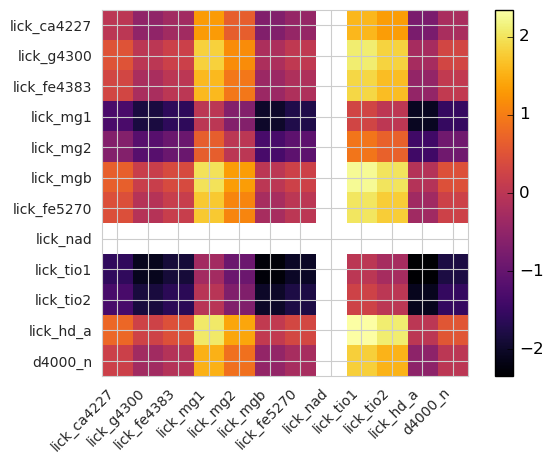

In [26]:

fig = plt.imshow(np.log10(matrices_SN2[10]),cmap='inferno', interpolation='nearest')
plt.style.use('classic')
plt.colorbar(fig)

plt.xticks(ticks=np.arange(len(flux_columns)), labels=flux_columns, rotation=45, ha='right', fontsize=10)
plt.yticks(ticks=np.arange(len(flux_columns)), labels=flux_columns, fontsize=10)

plt.tight_layout()
plt.show()

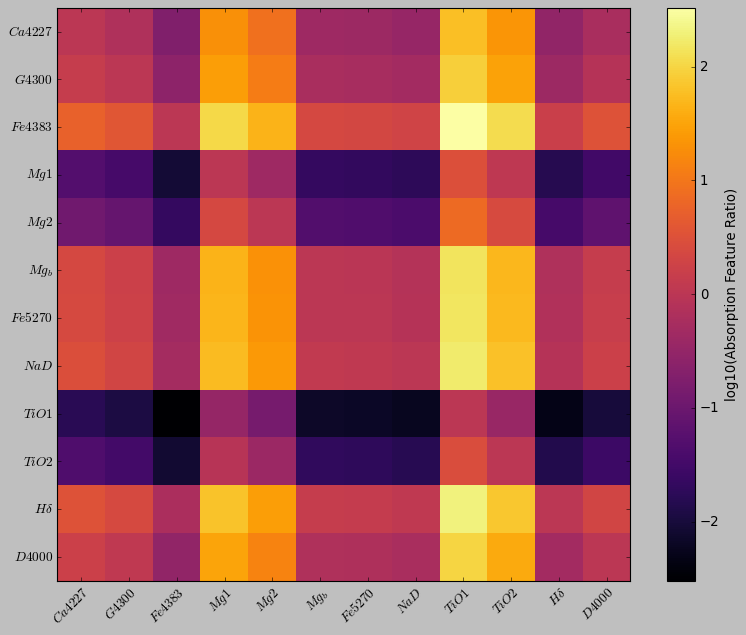

In [27]:

abbreviated_labels = [
    '$Ca4227$', '$G4300$', '$Fe4383$',  
    '$Mg1$', '$Mg2$', '$Mg_b$', '$Fe5270$', 
     '$NaD$', '$TiO1$', '$TiO2$', 
    #'$CaII\\;8498$', '$CaII\\;8542$', 
    #'$CaII\\;8662$', '$MgI\\;8807$', 
    '$H\delta$','$D4000$'
]


fig, ax = plt.subplots(figsize=(10, 8))

# Logarithm of the matrix for better visualization
im = ax.imshow(np.log10(matrices_SN2[1256]), cmap='inferno', interpolation='nearest')

ax.set_xticks(np.arange(len(abbreviated_labels)))
ax.set_yticks(np.arange(len(abbreviated_labels)))
ax.set_xticklabels(abbreviated_labels)
ax.set_yticklabels(abbreviated_labels)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

cbar = plt.colorbar(im)
cbar.set_label("log10(Absorption Feature Ratio)")

plt.style.use('classic')
plt.tight_layout()
plt.show()


In [28]:
"""
#### VIDEO PARA LAS SN>2 ####
# Ordenar las galaxias por el color (g-r)
merged_df_sorted = merged_df_filtered_SN2.sort_values(by='color_gr')

# Crear lista para guardar los frames
frames = []

# Abreviaciones para los índices de Lick
abbreviated_labels = [
    '$Ca4227$', '$G4300$', '$Fe4383$', '$Hβ$', 
    '$Mg1$', '$Mg2$', '$Mg_b$', '$Fe5270$', 
    '$Fe5335$', '$NaD$', '$TiO1$', '$TiO2$', 
    '$CaII\\;8498$', '$CaII\\;8542$', 
    '$CaII\\;8662$', '$MgI\\;8807$'
]

for idx, galaxy in merged_df_sorted.iterrows():
    # Crear figura
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Extraer la matriz de ratios para la galaxia actual
    ratio_matrix = matrices_SN2[idx]
    
    # Crear el heatmap
    im = ax.imshow(np.log10(ratio_matrix), cmap='viridis', vmin=-3, vmax=3)

    # Configurar etiquetas
    ax.set_xticks(np.arange(len(abbreviated_labels)))
    ax.set_yticks(np.arange(len(abbreviated_labels)))
    ax.set_xticklabels(abbreviated_labels)
    ax.set_yticklabels(abbreviated_labels)

    # Rotar etiquetas del eje x
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Añadir colorbar
    cbar = plt.colorbar(im)
    cbar.set_label('log10(Absorption Feature Ratio)', fontsize=10)

    # Títulos y etiquetas
    ax.set_title(f'Galaxy {idx} (g-r = {galaxy["color_gr"]:.2f})', fontsize=12)
    ax.set_xlabel('Lick Index (j)', fontsize=10)
    ax.set_ylabel('Lick Index (i)', fontsize=10)

    # Guardar el frame como imagen
    frame_filename = f'frame_{idx}.png'
    plt.savefig(frame_filename, bbox_inches='tight')
    frames.append(frame_filename)
    
    # Cerrar la figura
    plt.close()

# Crear el video a partir de los frames
with imageio.get_writer('galaxies_video_SN2.mp4', format='mp4', fps=2) as writer:
    for frame in frames:
        image = imageio.imread(frame)
        writer.append_data(image)

# Eliminar los archivos temporales (opcional)
import os
for frame in frames:
    os.remove(frame)"""


'\n#### VIDEO PARA LAS SN>2 ####\n# Ordenar las galaxias por el color (g-r)\nmerged_df_sorted = merged_df_filtered_SN2.sort_values(by=\'color_gr\')\n\n# Crear lista para guardar los frames\nframes = []\n\n# Abreviaciones para los índices de Lick\nabbreviated_labels = [\n    \'$Ca4227$\', \'$G4300$\', \'$Fe4383$\', \'$Hβ$\', \n    \'$Mg1$\', \'$Mg2$\', \'$Mg_b$\', \'$Fe5270$\', \n    \'$Fe5335$\', \'$NaD$\', \'$TiO1$\', \'$TiO2$\', \n    \'$CaII\\;8498$\', \'$CaII\\;8542$\', \n    \'$CaII\\;8662$\', \'$MgI\\;8807$\'\n]\n\nfor idx, galaxy in merged_df_sorted.iterrows():\n    # Crear figura\n    fig, ax = plt.subplots(figsize=(8, 6))\n    \n    # Extraer la matriz de ratios para la galaxia actual\n    ratio_matrix = matrices_SN2[idx]\n    \n    # Crear el heatmap\n    im = ax.imshow(np.log10(ratio_matrix), cmap=\'viridis\', vmin=-3, vmax=3)\n\n    # Configurar etiquetas\n    ax.set_xticks(np.arange(len(abbreviated_labels)))\n    ax.set_yticks(np.arange(len(abbreviated_labels)))\n    ax.se

In [29]:
### Guardar cocientes en .csv para SN > 2

clean_labels = [
    'Ca4227', 'G4300', 'Fe4383',  
    'Mg1', 'Mg2', 'Mg_b', 'Fe5270', 
     'NaD', 'TiO1', 'TiO2', 
    'Hd', 'D4000'
]


galaxy_data = []

# Iterar sobre las galaxias y las matrices de cocientes
for idx, galaxy in merged_df.iterrows():
    
    # Matriz de cocientes de la galaxia
    ratio_matrix = matrices_SN2[idx]

    # Índices de la triangular inferior, sin la diagonal
    tri_lower_indices = np.tril_indices(len(flux_columns), k=-1)

    # Valores de la triangular inferior
    tri_lower_values = ratio_matrix[tri_lower_indices]
    
    # Información de la galaxia
    galaxy_info = {
        'specObjId': galaxy['specObjId'],
        'color_gr': galaxy['color_gr'],  
        'M_r': galaxy['M_r'], 
        'z': galaxy['z'],
    }
    
    # Añadir los cocientes al diccionario
    for i, value in enumerate(tri_lower_values):
        label_i = clean_labels[tri_lower_indices[0][i]]
        label_j = clean_labels[tri_lower_indices[1][i]]
        galaxy_info[f'ratio_{label_i}/{label_j}'] = value
    
    galaxy_data.append(galaxy_info)

# Crear el DataFrame
df_galaxies_SN2 = pd.DataFrame(galaxy_data)

# Guardar el DataFrame en un archivo CSV
df_galaxies_SN2.to_csv('galaxy_indices_SN2.csv', index=False)

#print("DataFrame creado y guardado como 'galaxy_indices_SN2.csv'")


In [30]:
df_galaxies_SN2

specObjId  color_gr        M_r         z  ratio_G4300/Ca4227  \
0     1890442071513262080   0.30752 -20.203112  0.504029            1.153476   
1     1515512174368286720   0.13382 -17.908267  0.158843            0.192884   
2     1849999284963928064   0.43996 -21.099340  0.658958           24.220390   
3     1523417392472942592   0.28312 -16.768334  0.110968            1.736573   
4     2246201432648738816   0.76979 -21.598137  0.571130            3.049382   
...                   ...       ...        ...       ...                 ...   
7062  1488512841194432512   0.78874 -20.937059  0.511674            4.839402   
7063  1882603658336561152   0.40278 -22.211737  0.927883           -0.199434   
7064  2030104529202079744   0.65913 -21.198740  0.875138           10.859358   
7065  1634949103702009856   0.62324 -15.970827  0.072282            2.134256   
7066  1615838490153478144   0.46619 -18.113416  0.114281            1.625327   

      ratio_Fe4383/Ca4227  ratio_Fe4383/G4300  ratio_Mg1/Ca4227  \
0                9.007761            7.809231          0.110003   
1                3.107549           16.110943          0.089280   
2               72.169877            2.979716          0.203537   
3                5.295643            3.049479          0.078199   
4                5.804412            1.903472          0.154607   
...                   ...                 ...               ...   
7062             6.091660            1.258763          0.047782   
7063             5.767280          -28.918261          0.026653   
7064            19.115572            1.760286          0.276676   
7065             2.451778            1.148774          0.031076   
7066             2.184400            1.343975          0.080636   

      ratio_Mg1/G4300  ratio_Mg1/Fe4383  ratio_Mg2/Ca4227  ratio_Mg2/G4300  \
0            0.095366          0.012212          0.269505         0.233646   
1            0.462866          0.028730          0.117571         0.609543   
2            0.008404          0.002820          2.788372         0.115125   
3            0.045031          0.014767          0.115497         0.066509   
4            0.050701          0.026636          0.252792         0.082900   
...               ...               ...               ...              ...   
7062         0.009874          0.007844          0.190517         0.039368   
7063        -0.133642          0.004621          0.159110        -0.797808   
7064         0.025478          0.014474          1.016868         0.093640   
7065         0.014561          0.012675          0.093137         0.043639   
7066         0.049612          0.036915          0.208633         0.128364   

      ratio_Mg2/Fe4383  ratio_Mg2/Mg1  ratio_Mg_b/Ca4227  ratio_Mg_b/G4300  \
0             0.029919       2.449985           6.150372          5.332033   
1             0.037834       1.316890           1.904086          9.871643   
2             0.038636      13.699556          92.467479          3.817754   
3             0.021810       1.476953           2.982224          1.717304   
4             0.043552       1.635069           4.492688          1.473311   
...                ...            ...                ...               ...   
7062          0.031275       3.987216           3.355708          0.693414   
7063          0.027588       5.969759           4.346912        -21.796261   
7064          0.053196       3.675300          22.083668          2.033607   
7065          0.037988       2.997090           1.360937          0.637664   
7066          0.095511       2.587331           4.618964          2.841867   

      ratio_Mg_b/Fe4383  ratio_Mg_b/Mg1  ratio_Mg_b/Mg2  ratio_Fe5270/Ca4227  \
0              0.682786       55.911079       22.820984             5.184227   
1              0.612729       21.327228       16.195144             0.557245   
2              1.281248      454.302182       33.161818            43.069367   
3              0.563147       38.136143       25.820816 

In [324]:
merged_df['AGN_combinado'] = (
    merged_df['AGN_BPT-NII'] & 
    merged_df['AGN_VO87-OI'] &
    merged_df['AGN_VO87-SII']
)

### Cocientes Relevantes

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

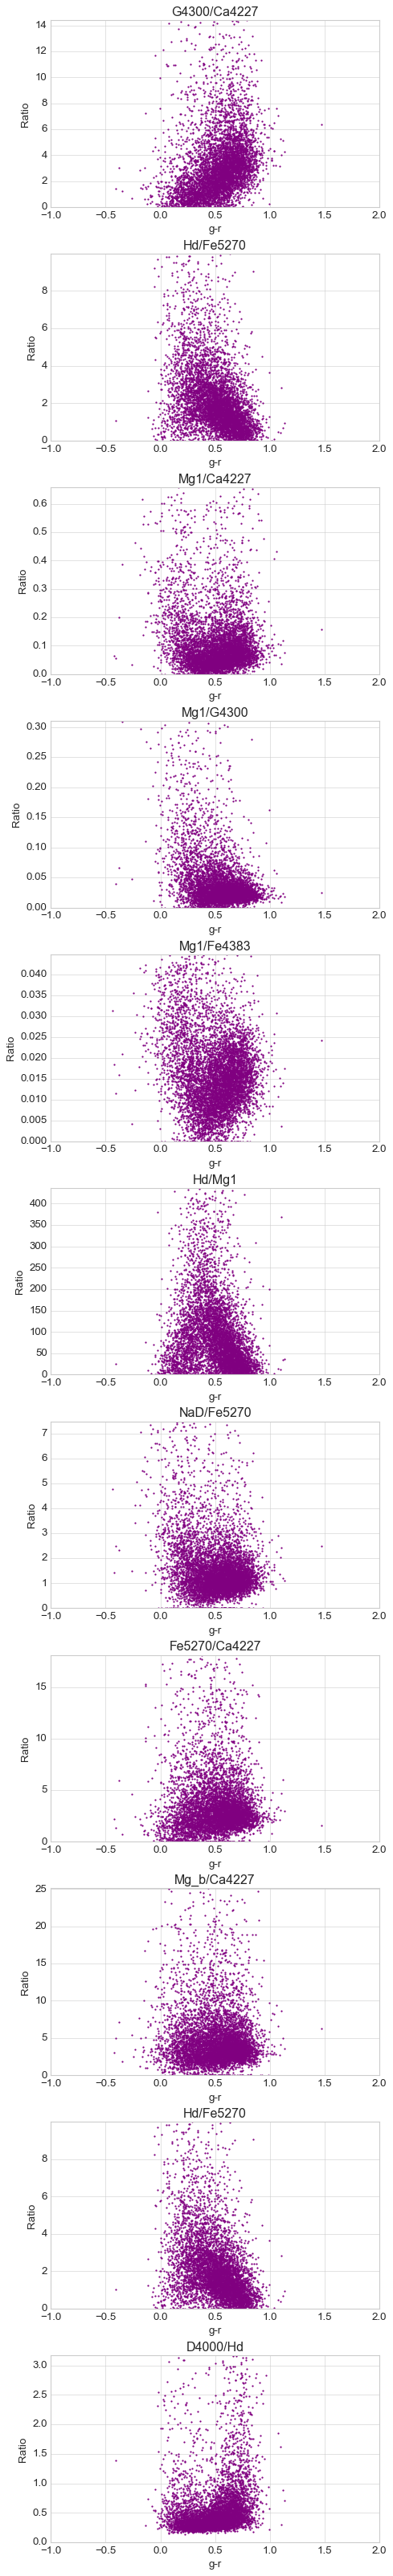

In [413]:
#### Cocientes interesantes a revisar ####
   
fig, axs = plt.subplots(11, 1, figsize=(6, 40), constrained_layout=True)  

#x = df_galaxies['color_gr'] # SN > 5
x_1 = df_galaxies_SN2['color_gr'] # SN > 2


axs[0].scatter(x_1, df_galaxies_SN2['ratio_G4300/Ca4227'], s=1, color='purple')
#axs[0].scatter(x_1[merged_df['AGN_combinado']==True], df_galaxies_SN2['ratio_G4300/Ca4227'][merged_df['AGN_combinado']==True], s=1, color='orange')
axs[0].set_title('G4300/Ca4227')
p5, p95 = np.nanpercentile(df_galaxies_SN2['ratio_G4300/Ca4227'], [1, 95])
axs[0].set_ylim(0, p95 + 0.1 * (p95 - p5))  # Extend limits slightly

#axs[0].set_ylim(0, 1)


axs[1].scatter(x_1, df_galaxies_SN2['ratio_Hd/Fe5270'], s=1, color='purple')
#axs[1].scatter(x_1[merged_df['AGN_combinado']==True], df_galaxies_SN2['ratio_Hd/Fe5270'][merged_df['AGN_combinado']==True], s=1, color='orange')
axs[1].set_title('Hd/Fe5270')
p5, p95 = np.nanpercentile(df_galaxies_SN2['ratio_Hd/Fe5270'], [1, 95])
axs[1].set_ylim(0, p95 + 0.1 * (p95 - p5))  # Extend limits slightly

#axs[1].set_ylim(0, 1)


axs[2].scatter(x_1, df_galaxies_SN2['ratio_Mg1/Ca4227'], s=1, color='purple')
#axs[2].scatter(x_1[merged_df['AGN_combinado']==True], df_galaxies_SN2['ratio_Mg1/Ca4227'][merged_df['AGN_combinado']==True], s=1, color='orange')
axs[2].set_title('Mg1/Ca4227')
p5, p95 = np.nanpercentile(df_galaxies_SN2['ratio_Mg1/Ca4227'], [1, 95])
axs[2].set_ylim(0, p95 + 0.1 * (p95 - p5))  # Extend limits slightly

#axs[2].set_ylim(0, 1)

axs[3].scatter(x_1, df_galaxies_SN2['ratio_Mg1/G4300'], s=1, color='purple')
#axs[3].scatter(x_1[merged_df['AGN_combinado']==True], df_galaxies_SN2['ratio_Mg1/G4300'][merged_df['AGN_combinado']==True], s=1, color='orange')
axs[3].set_title('Mg1/G4300')
p5, p95 = np.nanpercentile(df_galaxies_SN2['ratio_Mg1/G4300'], [1, 95])
axs[3].set_ylim(0, p95 + 0.1 * (p95 - p5))  # Extend limits slightly
#axs[3].set_ylim(0, 1)

axs[4].scatter(x_1, df_galaxies_SN2['ratio_Mg1/Fe4383'], s=1, color='purple')
#axs[4].scatter(x_1[merged_df['AGN_combinado']==True], df_galaxies_SN2['ratio_Mg1/Fe4383'][merged_df['AGN_combinado']==True], s=1, color='orange')
axs[4].set_title('Mg1/Fe4383')
p5, p95 = np.nanpercentile(df_galaxies_SN2['ratio_Mg1/Fe4383'], [1, 95])
axs[4].set_ylim(0, p95 + 0.1 * (p95 - p5))  # Extend limits slightly
#axs[4].set_ylim(0, 1)

axs[5].scatter(x_1, df_galaxies_SN2['ratio_Hd/Mg1'], s=1, color='purple')
#axs[5].scatter(x_1[merged_df['AGN_combinado']==True], df_galaxies_SN2['ratio_Hd/Mg1'][merged_df['AGN_combinado']==True], s=1, color='orange')
axs[5].set_title('Hd/Mg1')
p5, p95 = np.nanpercentile(df_galaxies_SN2['ratio_Hd/Mg1'], [1, 95])
axs[5].set_ylim(0, p95 + 0.1 * (p95 - p5))  # Extend limits slightly
#axs[5].set_ylim(0, 1)

axs[6].scatter(x_1, df_galaxies_SN2['ratio_NaD/Fe5270'] , s=1, color='purple')
#axs[6].scatter(x_1[merged_df['AGN_combinado']==True], df_galaxies_SN2['ratio_NaD/Fe5270'][merged_df['AGN_combinado']==True] , s=1, color='orange')
axs[6].set_title('NaD/Fe5270')
p5, p95 = np.nanpercentile(df_galaxies_SN2['ratio_NaD/Fe5270'], [1, 95])
axs[6].set_ylim(0, p95 + 0.1 * (p95 - p5))  # Extend limits slightly
#axs[6].set_ylim(0, 1)

axs[7].scatter(x_1, df_galaxies_SN2['ratio_Fe5270/Ca4227'] , s=1, color='purple')
#axs[7].scatter(x_1[merged_df['AGN_combinado']==True], df_galaxies_SN2['ratio_Fe5270/Ca4227'][merged_df['AGN_combinado']==True], s=1, color='orange')
axs[7].set_title('Fe5270/Ca4227')
p5, p95 = np.nanpercentile(df_galaxies_SN2['ratio_Fe5270/Ca4227'], [1, 95])
axs[7].set_ylim(0, p95 + 0.1 * (p95 - p5))  # Extend limits slightly
#axs[7].set_ylim(0, 1)

axs[8].scatter(x_1, df_galaxies_SN2['ratio_Mg_b/Ca4227'] , s=1, color='purple')
#axs[8].scatter(x_1[merged_df['AGN_combinado']==True], df_galaxies_SN2['ratio_Mg_b/Ca4227'][merged_df['AGN_combinado']==True] , s=1, color='orange')
axs[8].set_title('Mg_b/Ca4227')
p5, p95 = np.nanpercentile(df_galaxies_SN2['ratio_Mg_b/Ca4227'], [1, 95])
axs[8].set_ylim(0, p95 + 0.1 * (p95 - p5))  # Extend limits slightly
#axs[8].set_ylim(0, 1)

axs[9].scatter(x_1, df_galaxies_SN2['ratio_Hd/Fe5270'] , s=1, color='purple')
#axs[9].scatter(x_1[merged_df['AGN_combinado']==True], df_galaxies_SN2['ratio_Hd/Fe5270'][merged_df['AGN_combinado']==True] , s=1, color='orange')
axs[9].set_title('Hd/Fe5270')
p5, p95 = np.nanpercentile(df_galaxies_SN2['ratio_Hd/Fe5270'], [1, 95])
axs[9].set_ylim(0, p95 + 0.1 * (p95 - p5))  # Extend limits slightly
#axs[9].set_ylim(0, 1)

axs[10].scatter(x_1, df_galaxies_SN2['ratio_D4000/Hd'] , s=1, color='purple')
#axs[10].scatter(x_1[merged_df['AGN_combinado']==True], df_galaxies_SN2['ratio_D4000/Hd'][merged_df['AGN_combinado']==True] , s=1, color='orange')
axs[10].set_title('D4000/Hd')
p5, p95 = np.nanpercentile(df_galaxies_SN2['ratio_D4000/Hd'], [1, 95])
axs[10].set_ylim(0, p95 + 0.1 * (p95 - p5))  # Extend limits slightly
#axs[10].set_ylim(0, 1)

"""legend_handles = [mpatches.Patch(color='purple', label='All galaxies'),
                  mpatches.Patch(color='orange', label='AGN')]
"""
for ax in axs:
    ax.set_xlabel('g-r')
    ax.set_ylabel('Ratio')
    ax.legend(loc='upper right', prop={'size': 10}) #handles=legend_handles, 

plt.style.use('seaborn-whitegrid')
plt.show()

In [328]:
len(merged_df['d4000_n'][merged_df['color_gr']>0.6]/merged_df['lick_hd_a'][merged_df['color_gr']>0.6])


2422

In [332]:
len(merged_df['specObjId'][merged_df['AGN_combinado']==True])

757

In [335]:
757/2422

0.31255161023947153

(-500.0, 8000.0)

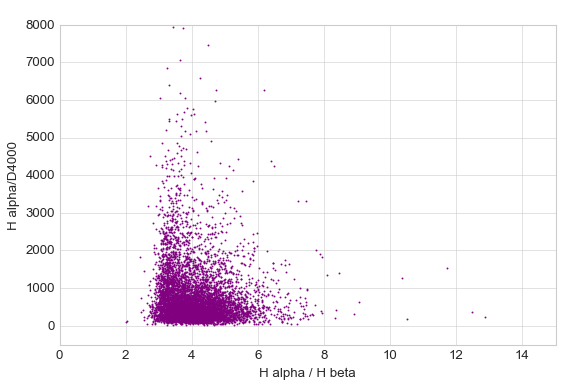

In [32]:
plt.figure(figsize=(8, 5))
plt.scatter(merged_df['h_alpha_flux']/merged_df['h_beta_flux'], 
            merged_df['h_alpha_flux']/merged_df['d4000_n'], 
            s=0.5, color='purple', label='Todas las galaxias')

# Labels and title
plt.title(' ')
plt.xlabel('H alpha / H beta')
plt.ylabel('H alpha/D4000')
plt.xlim(0,15)
plt.ylim(-500,8000)

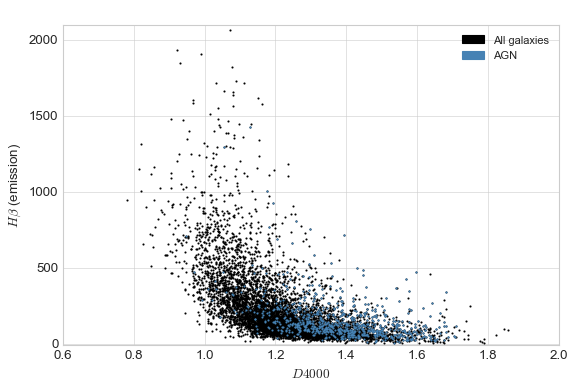

In [206]:
plt.figure(figsize=(8, 5))
plt.scatter(merged_df['d4000_n'],merged_df['h_beta_flux'], 
            s=0.8, color='black', label='All galaxies')

plt.scatter(merged_df['d4000_n'][merged_df['AGN_combinado']==True],merged_df['h_beta_flux'][merged_df['AGN_combinado']==True], 
            s=0.8, color='steelblue', label='AGN')

# Labels and title
plt.title(' ')
plt.xlabel('$D4000$')
plt.ylabel(r'$H \beta$ (emission)')
#plt.xlim(0,4)
plt.ylim(-5,2100)
legend_handles = [mpatches.Patch(color='black', label='All galaxies'),
                  mpatches.Patch(color='steelblue', label='AGN')]

plt.legend(handles=legend_handles, loc='upper right', prop={'size': 10})


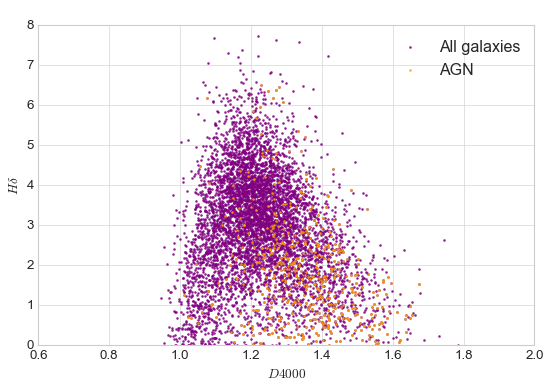

In [213]:
plt.figure(figsize=(8, 5))
plt.scatter(merged_df['d4000_n'],merged_df['lick_hd_a'], 
            s=2, alpha=0.7, color='purple', label='All galaxies')
plt.scatter(merged_df['d4000_n'][merged_df['AGN_combinado']==True],merged_df['lick_hd_a'][merged_df['AGN_combinado']==True], 
            s=2, alpha=0.7,color='orange', label='AGN')

# Labels and title
plt.title(' ')
plt.xlabel('$D4000$')
plt.ylabel('$H\delta$')
plt.ylim(0,8)
plt.legend()
#plt.ylim(-500,2500)

Text(0.5, 0, 'g-r')

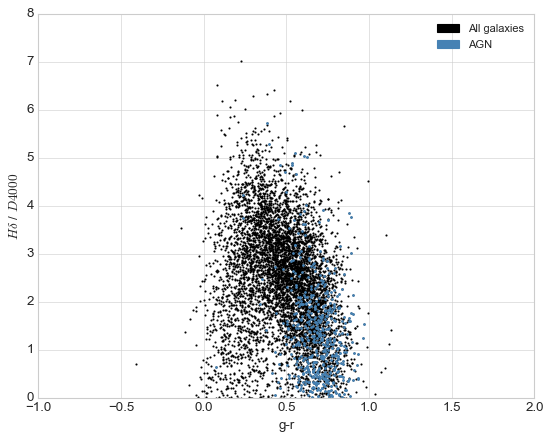

In [208]:
plt.scatter(merged_df['color_gr'], merged_df['lick_hd_a']/merged_df['d4000_n'], s=0.8, label='All galaxies', color='black')
plt.scatter(merged_df['color_gr'][merged_df['AGN_combinado']==True], merged_df['lick_hd_a'][merged_df['AGN_combinado']==True]/merged_df['d4000_n'][merged_df['AGN_combinado']==True], s=2, label='AGN', color='steelblue')
plt.ylim(0,8)

plt.ylabel(r'$H\delta$ / $D4000$')
legend_handles = [mpatches.Patch(color='black', label='All galaxies'),
                  mpatches.Patch(color='steelblue', label='AGN')]

plt.legend(handles=legend_handles, loc='upper right', prop={'size': 10})

plt.xlabel('g-r')

Text(0.5, 0, 'D4000')

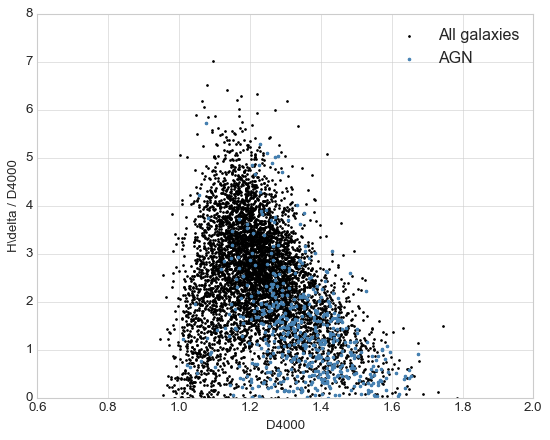

In [52]:
plt.scatter(merged_df['d4000_n'], merged_df['lick_hd_a']/merged_df['d4000_n'], s=2, label='All galaxies', color='black')
plt.scatter(merged_df['d4000_n'][merged_df['AGN_combinado']==True], merged_df['lick_hd_a'][merged_df['AGN_combinado']==True]/merged_df['d4000_n'][merged_df['AGN_combinado']==True], s=5, label='AGN', color='steelblue')
plt.ylim(0,8)
plt.legend()
plt.ylabel('H\delta / D4000')
plt.xlabel('D4000')

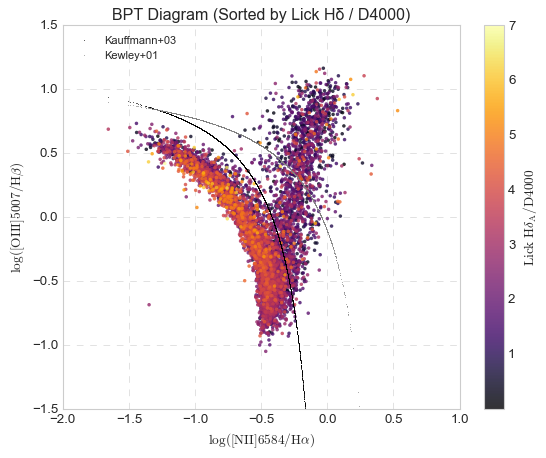

In [47]:
color_ratio = merged_df['lick_hd_a'] / merged_df['d4000_n']

#(only positive values)
mask = color_ratio > 0
x_data = np.log10(merged_df['nii_6584_flux'][mask] / merged_df['h_alpha_flux'][mask])
y_data = np.log10(merged_df['oiii_5007_flux'][mask] / merged_df['h_beta_flux'][mask])
filtered_color_ratio = color_ratio[mask].values  # Convert to NumPy array for sorting

#Sort points based on color_ratio for better visibility
sort_idx = np.argsort(filtered_color_ratio)  # Sorting indices
x_sorted = x_data.values[sort_idx]
y_sorted = y_data.values[sort_idx]
color_sorted = filtered_color_ratio[sort_idx]

#Kauffmann+03 and Kewley+01 curves
log_y_kauffmann = 0.61 / (x_sorted - 0.05) + 1.3
log_y_kewley = 0.61 / ((x_sorted) - 0.47) + 1.19

plt.figure(figsize=(8, 6))
sc = plt.scatter(x_sorted, y_sorted, c=color_sorted, cmap='inferno', alpha=0.8, s=10, edgecolors='none')

plt.plot(x_sorted, log_y_kauffmann, '.', color='black', label='Kauffmann+03', markersize=0.6, alpha=1)
plt.plot(x_sorted, log_y_kewley, '.', color='grey', label='Kewley+01', markersize=0.6, alpha=1)

cbar = plt.colorbar(sc)
cbar.set_label(r'$\mathrm{Lick\ H\delta_A / D4000}$')

plt.ylim(-1.5, 1.5)
plt.ylabel(r'$\log(\mathrm{[OIII] 5007 / H\beta})$')
plt.xlabel(r'$\log(\mathrm{[NII] 6584 / H\alpha})$')
plt.title('BPT Diagram (Sorted by Lick Hδ / D4000)')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend(loc='upper left', fontsize=10)

plt.show()


# Correcion H beta 

In [53]:
def correct(f_alpha, f_beta, galaxy_type='Normal'):
    """
    if galaxy_type == 'AGN':
        c = 3.1*(np.log10(f_alpha/f_beta) - np.log10(3.1))
    else:
        c = 3.1*(np.log10(f_alpha/f_beta) - np.log10(2.78))"""
    c = 3.1*(np.log10(f_alpha/f_beta) - np.log10(2.78))
    return c


#Whitford reddening curve values for Balmer lines
whitford_f_lambda = {
    'h_alpha': 0.666,
    'h_beta': 1.0, 
    'h_gamma': 1.151,
    'h_delta': 1.220
}


def Intrinsec_flux(F_obs, C, line_name):
    """
    Corrects the observed flux for reddening using the Whitford reddening curve.
    
    Parameters:
        F_obs (float or array): Observed flux.
        C (float): Extinction coefficient.
        line_name (str): Name of the Balmer line ('h_alpha', 'h_beta', 'h_gamma', 'h_delta').

    Returns:
        float or array: Intrinsic (de-reddened) flux.
    """
    f_lambda = whitford_f_lambda.get(line_name, None)
    
    if f_lambda is None:
        raise ValueError("Balmer lines only: 'h_alpha', 'h_beta', 'h_gamma', 'h_delta'")
    
    #F_int = F_obs * 10**(C * f_lambda)
    F_int = np.log10(F_obs) + C*f_lambda
    #print(C)
    return  F_int #C*f_lambda #F_int


In [54]:
merged_df['c_extinct'] = merged_df.apply(
    lambda row: correct(row['h_alpha_flux'], row['h_beta_flux'], 
                        galaxy_type='AGN' if row['AGN_BPT-NII'] else 'Normal'),
    axis=1
)

for line in ['h_alpha', 'h_beta']:
    #merged_df[f'{line}_flux_int'] = merged_df.apply(
        #lambda row: Intrinsec_flux(row[f'{line}_flux'], row['c_extinct'], line),
        #axis=1
    #)
    merged_df[f'{line}_flux_int'] = Intrinsec_flux(merged_df[f'{line}_flux'], merged_df['c_extinct'], line)


In [55]:
beta_corregido = 10**merged_df['h_beta_flux_int']

(-5.0, 2100.0)

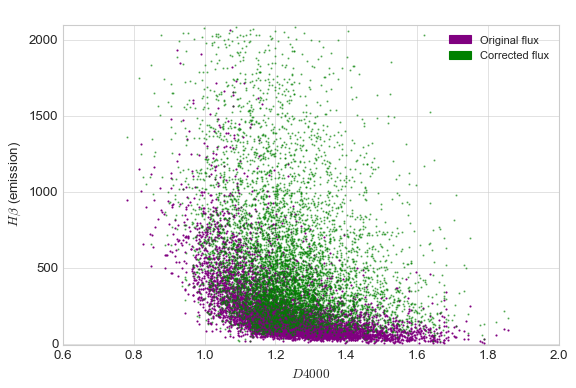

In [212]:
plt.figure(figsize=(8, 5))


plt.scatter(merged_df['d4000_n'],merged_df['h_beta_flux'], 
            s=0.8, color='purple', label='Original flux')
plt.scatter(merged_df['d4000_n'],beta_corregido, 
            s=0.8, alpha=0.5, color='green', label='Corrected flux')

# Labels and title
plt.title(' ')
plt.xlabel(r'$D4000$')
plt.ylabel(r' $H \beta$ (emission)')
#plt.xlim(0,4)
legend_handles = [mpatches.Patch(color='purple', label='Original flux'),
                  mpatches.Patch(color='green', label='Corrected flux')]

plt.legend(handles=legend_handles, loc='upper right', prop={'size': 10})
plt.ylim(-5,2100)

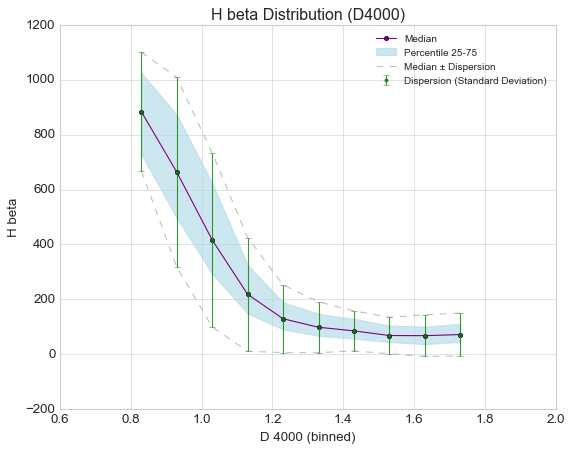

In [57]:
bin_size = 0.1
bins = np.arange(merged_df['d4000_n'].min(), merged_df['d4000_n'].max() , bin_size)

#Agrupar por bins y calcular estadísticas
bin_groups = merged_df.groupby(pd.cut(merged_df['d4000_n'], bins))['h_beta_flux']
medians = bin_groups.median()
percentiles_25 = bin_groups.quantile(0.25)
percentiles_75 = bin_groups.quantile(0.75)
dispersion = bin_groups.std()

x_coords = [interval.mid for interval in medians.index]

plt.plot(x_coords, medians, color='purple', marker='o', markersize=4, label='Median')
plt.fill_between(x_coords, percentiles_25, percentiles_75, color='lightblue', alpha=0.6, label='Percentile 25-75')
plt.errorbar(x_coords, medians, yerr=dispersion, fmt='.', color='green', alpha=0.8, label='Dispersion (Standard Deviation)')
plt.plot(x_coords, medians + dispersion, linestyle='--', color='gray', alpha=0.5, label='Median ± Dispersion')
plt.plot(x_coords, medians - dispersion, linestyle='--', color='gray', alpha=0.5)

plt.title('H beta Distribution (D4000)')
plt.xlabel('D 4000 (binned)')
plt.ylabel('H beta')
plt.xlim(0.6, 2)
plt.legend(prop={'size': 9}, loc='best')

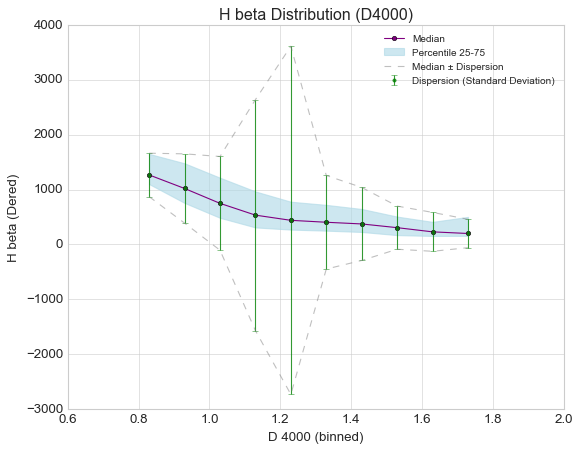

In [58]:
bin_size = 0.1
bins = np.arange(merged_df['d4000_n'].min(), merged_df['d4000_n'].max() , bin_size)

#Agrupar por bins y calcular estadísticas
bin_groups = beta_corregido.groupby(pd.cut(merged_df['d4000_n'], bins))
medians = bin_groups.median()
percentiles_25 = bin_groups.quantile(0.25)
percentiles_75 = bin_groups.quantile(0.75)
dispersion = bin_groups.std()

x_coords = [interval.mid for interval in medians.index]

plt.plot(x_coords, medians, color='purple', marker='o', markersize=4, label='Median')
plt.fill_between(x_coords, percentiles_25, percentiles_75, color='lightblue', alpha=0.6, label='Percentile 25-75')
plt.errorbar(x_coords, medians, yerr=dispersion, fmt='.', color='green', alpha=0.8, label='Dispersion (Standard Deviation)')
plt.plot(x_coords, medians + dispersion, linestyle='--', color='gray', alpha=0.5, label='Median ± Dispersion')
plt.plot(x_coords, medians - dispersion, linestyle='--', color='gray', alpha=0.5)

plt.title('H beta Distribution (D4000)')
plt.xlabel('D 4000 (binned)')
plt.ylabel('H beta (Dered)')
plt.xlim(0.6, 2)
plt.legend(prop={'size': 9}, loc='best')

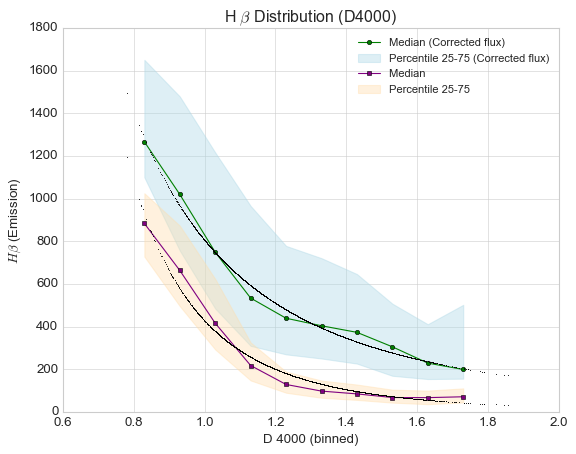

In [127]:
bin_size = 0.1
bins = np.arange(merged_df['d4000_n'].min(), merged_df['d4000_n'].max(), bin_size)

#Corregido
bin_groups_1 = beta_corregido.groupby(pd.cut(merged_df['d4000_n'], bins))
medians_1 = bin_groups_1.median()
percentiles_25_1 = bin_groups_1.quantile(0.25)
percentiles_75_1 = bin_groups_1.quantile(0.75)
dispersion_1 = bin_groups_1.std()
x_coords_1 = [interval.mid for interval in medians_1.index]

#Normal
bin_groups_2 = merged_df.groupby(pd.cut(merged_df['d4000_n'], bins))['h_beta_flux']
medians_2 = bin_groups_2.median()
percentiles_25_2 = bin_groups_2.quantile(0.25)
percentiles_75_2 = bin_groups_2.quantile(0.75)
dispersion_2 = bin_groups_2.std()
x_coords_2 = [interval.mid for interval in medians_2.index]

plt.figure(figsize=(8, 6))

plt.plot(x_coords_1, medians_1, color='green', marker='o', markersize=4, label='Median (Corrected flux)')
plt.fill_between(x_coords_1, percentiles_25_1, percentiles_75_1, color='lightblue', alpha=0.4, label='Percentile 25-75 (Corrected flux)')
#plt.errorbar(x_coords_1, medians_1, yerr=dispersion_1, fmt='.', color='green', alpha=0.8, label='Dispersion (Corrected flux)')
plt.plot(merged_df['d4000_n'], 805.44*(merged_df['d4000_n'])**(-2.50),'.', color='black', markersize=0.8, alpha=1 )

plt.plot(x_coords_2, medians_2, color='purple', marker='s', markersize=4, label='Median ')
plt.fill_between(x_coords_2, percentiles_25_2, percentiles_75_2, color='navajowhite', alpha=0.4, label='Percentile 25-75')
#plt.errorbar(x_coords_2, medians_2, yerr=dispersion_2, fmt='.', color='red', alpha=0.8, label='Dispersion')
plt.plot(merged_df['d4000_n'], 428.21*(merged_df['d4000_n'])**(-4.14),'.', color='black', markersize=0.8, alpha=1 )

plt.title(r'H $\beta$ Distribution (D4000)')
plt.xlabel('D 4000 (binned)')
plt.ylabel(r'$H\beta$ (Emission)')
plt.xlim(0.6, 2)
plt.legend(prop={'size': 10}, loc='best')
plt.grid(True)

plt.show()


In [123]:
from scipy.optimize import curve_fit

def power_law(x, A, B):
    return A * x**B

x_data = x_coords_2 
y_data = medians_2.values 

popt, pcov = curve_fit(power_law, x_data, y_data, p0=(800, -2.6))  # Initial guess (A=800, B=-2.6)

A_fit, B_fit = popt
print(f"Best-fit parameters: A = {A_fit:.2f}, B = {B_fit:.2f}")


Best-fit parameters: A = 428.21, B = -4.14


In [89]:
#bin_groups_1 
medians_2

d4000_n
(0.78, 0.88]    883.80680
(0.88, 0.98]    663.64470
(0.98, 1.08]    416.22090
(1.08, 1.18]    217.94850
(1.18, 1.28]    129.07590
(1.28, 1.38]     97.98447
(1.38, 1.48]     84.88030
(1.48, 1.58]     67.89157
(1.58, 1.68]     67.36441
(1.68, 1.78]     71.38840
Name: h_beta_flux, dtype: float64

In [ ]:
"""beta_corregido.to_csv('beta_corregido.csv')
merged_df['h_beta_flux'].to_csv('beta_raw.csv')
merged_df['d4000_n'].to_csv('d4000.csv')"""

In [96]:
df_lineas = pd.read_csv('galaxy_ratios_SN2.csv')
df_lineas

specObjId  color_gr        M_r         z  AGN_Kewley  \
0     1890442071513262080   0.30752 -20.203112  0.504029       False   
1     1515512174368286720   0.13382 -17.908267  0.158843       False   
2     1849999284963928064   0.43996 -21.099340  0.658958       False   
3     1523417392472942592   0.28312 -16.768334  0.110968       False   
4     2246201432648738816   0.76979 -21.598137  0.571130        True   
...                   ...       ...        ...       ...         ...   
7062  1488512841194432512   0.78874 -20.937059  0.511674       False   
7063  1882603658336561152   0.40278 -22.211737  0.927883       False   
7064  2030104529202079744   0.65913 -21.198740  0.875138       False   
7065  1634949103702009856   0.62324 -15.970827  0.072282       False   
7066  1615838490153478144   0.46619 -18.113416  0.114281       False   

      AGN_VO87-OI  AGN_BPT-NII  AGN_VO87-SII  ratio_OII 3729/OII 3726  \
0           False        False         False                 1.116740   
1           False        False         False                 1.174140   
2           False        False         False                 0.331685   
3           False        False         False                 1.116130   
4            True         True          True                 1.425094   
...           ...          ...           ...                      ...   
7062         True         True         False                 0.652775   
7063        False        False         False                 1.842991   
7064        False         True         False                 1.560169   
7065        False        False         False                 1.163518   
7066        False        False         False                 1.098980   

      ratio_OIII 4363/OII 3726  ratio_OIII 4363/OII 3729  ratio_Hβ/OII 3726  \
0                     0.017361                  0.015546           0.803110   
1                     0.015497                  0.013198           0.961257   
2                     0.017601                  0.053067           0.829278   
3                     0.040365                  0.036165           1.020880   
4                     0.086026                  0.060365           1.091062   
...                        ...                       ...                ...   
7062                  0.154367                  0.236478           0.505167   
7063                  0.136642                  0.074142           2.860433   
7064                  0.312653                  0.200397           3.020601   
7065                  0.056238                  0.048335           1.127785   
7066                  0.057913                  0.052697           1.943152   

      ratio_Hβ/OII 3729  ratio_Hβ/OIII 4363  ratio_OIII 4959/OII 3726  \
0              0.719156           46.258647                  0.461432   
1              0.818691           62.029272                  0.881101   
2              2.500195           47.114084                  0.142414   
3              0.914660           25.291326                  0.162394   
4              0.765608           12.682877                  1.751847   
...                 ...                 ...                       ...   
7062           0.773876            3.272515                  0.254220   
7063           1.552061           20.933741                  0.226531   
7064           1.936073            9.661206                  0.812300   
7065           0.969288           20.053627                  0.194330   
7066           1.768141           33.552804                  0.188690   

      ratio_OIII 4959/OII 3729  ratio_OIII 4959/OIII 4363  ratio_OIII 4959/Hβ  \
0                     0.413195                  26.578183            0.574556   
1                     0.750423                  56.856836            0.916613   
2                     0.429364                   8.091000            0.171732   
3                     0.145497                   4.023151            0.159072   
4                     1.229285             

In [98]:
# Asegurarse de que las columnas 'specObjId' tengan el mismo tipo de datos
df_lineas['specObjId'] = df_lineas['specObjId'].astype(str)
df_galaxies_SN2['specObjId'] = df_galaxies_SN2['specObjId'].astype(str)

# Encontrar las intersecciones de los specObjId
coincidencias = pd.merge(df_lineas, df_galaxies_SN2, on='specObjId', how='inner')

# Número de coincidencias
num_coincidencias = coincidencias.shape[0]
print(f"Número de galaxias que coinciden: {num_coincidencias}")

# Opcional: Ver las galaxias coincidentes
coincidencias


Número de galaxias que coinciden: 13


specObjId  color_gr_x      M_r_x       z_x  AGN_Kewley  \
0   2086313477927888896     0.75391 -21.751573  0.364431        True   
1   2661737118757316608     0.64388 -20.242979  0.156997       False   
2   2492837015402342400     0.67747 -22.125640  0.498239       False   
3   2723673440128100352     0.73710 -19.593970  0.129278        True   
4   2394906264585922560     0.60779 -22.915510  0.513579        True   
5    863620516789905408     0.78902 -21.637297  0.314741       False   
6    403174726609954816     0.71255 -23.254959  0.600015        True   
7    306272844772304896     0.70485 -23.417496  0.736296       False   
8    502229455637342208     0.78420 -22.036385  0.488372       False   
9    435832420525172736     0.80605 -23.123378  0.655916        True   
10   709390093227419648     0.64838 -19.345031  0.080058       False   
11  1384980075547486208     0.64720 -22.679207  0.660567       False   
12   797175928319928320     0.75447 -22.273284  0.507608        True   

    AGN_VO87-OI  AGN_BPT-NII  AGN_VO87-SII  ratio_OII 3729/OII 3726  \
0          True         True         False                 1.356665   
1         False        False         False                 1.406009   
2         False        False         False                 1.719738   
3          True         True         False                 0.864838   
4          True        False          True                 0.965716   
5         False        False         False                 1.376530   
6          True        False          True                 0.950576   
7         False        False         False                 1.029495   
8         False         True         False                 0.731320   
9          True         True          True                 0.400412   
10        False        False         False                 1.493137   
11        False         True         False                 1.381189   
12         True         True          True                 1.177514   

    ratio_OIII 4363/OII 3726  ratio_OIII 4363/OII 3729  ratio_Hβ/OII 3726  \
0                   0.266726                  0.196604           1.688630   
1                   0.247031                  0.175697           2.915077   
2                   0.365765                  0.212686           3.358109   
3                   0.404651                  0.467892           1.715006   
4                   0.189386                  0.196109           0.751369   
5                   0.334152                  0.242749           1.841078   
6                   0.070491                  0.074156           0.865101   
7                   0.209562                  0.203558           3.197284   
8                   0.253730                  0.346947           1.093485   
9                   0.124968                  0.312099           0.667896   
10                  0.174078                  0.116585           2.905963   
11                  0.161777                  0.117129           1.743608   
12                  0.110483                  0.093827           0.424835   

    ratio_Hβ/OII 3729  ratio_Hβ/OIII 4363  ratio_OIII 4959/OII 3726  \
0            1.244692            6.330958                  2.454322   
1            2.073299           11.800433                  0.569797   
2            1.952687            9.181067                  0.411254   
3            1.983036            4.238237                  1.324948   
4            0.778044            3.967402                  2.683177   
5            1.337478            5.509705                  0.314707   
6            0.910080           12.272539                  1.900047   
7            3.105681           15.257009                  0.392722   
8            1.495220            4.309645                  0.425242   
9            1.668023            5.344536                  0.822910   
10           1.946213           16.693479                  0.388090   
11           1.262396           10.777841                  0.565199   
12      

# Clustering con DBScan 

In [129]:
df_galaxies_SN2

specObjId  color_gr        M_r         z  ratio_G4300/Ca4227  \
0     1890442071513262080   0.30752 -20.203112  0.504029            1.153476   
1     1515512174368286720   0.13382 -17.908267  0.158843            0.192884   
2     1849999284963928064   0.43996 -21.099340  0.658958           24.220390   
3     1523417392472942592   0.28312 -16.768334  0.110968            1.736573   
4     2246201432648738816   0.76979 -21.598137  0.571130            3.049382   
...                   ...       ...        ...       ...                 ...   
7062  1488512841194432512   0.78874 -20.937059  0.511674            4.839402   
7063  1882603658336561152   0.40278 -22.211737  0.927883           -0.199434   
7064  2030104529202079744   0.65913 -21.198740  0.875138           10.859358   
7065  1634949103702009856   0.62324 -15.970827  0.072282            2.134256   
7066  1615838490153478144   0.46619 -18.113416  0.114281            1.625327   

      ratio_Fe4383/Ca4227  ratio_Fe4383/G4300  ratio_Mg1/Ca4227  \
0                9.007761            7.809231          0.110003   
1                3.107549           16.110943          0.089280   
2               72.169877            2.979716          0.203537   
3                5.295643            3.049479          0.078199   
4                5.804412            1.903472          0.154607   
...                   ...                 ...               ...   
7062             6.091660            1.258763          0.047782   
7063             5.767280          -28.918261          0.026653   
7064            19.115572            1.760286          0.276676   
7065             2.451778            1.148774          0.031076   
7066             2.184400            1.343975          0.080636   

      ratio_Mg1/G4300  ratio_Mg1/Fe4383  ratio_Mg2/Ca4227  ratio_Mg2/G4300  \
0            0.095366          0.012212          0.269505         0.233646   
1            0.462866          0.028730          0.117571         0.609543   
2            0.008404          0.002820          2.788372         0.115125   
3            0.045031          0.014767          0.115497         0.066509   
4            0.050701          0.026636          0.252792         0.082900   
...               ...               ...               ...              ...   
7062         0.009874          0.007844          0.190517         0.039368   
7063        -0.133642          0.004621          0.159110        -0.797808   
7064         0.025478          0.014474          1.016868         0.093640   
7065         0.014561          0.012675          0.093137         0.043639   
7066         0.049612          0.036915          0.208633         0.128364   

      ratio_Mg2/Fe4383  ratio_Mg2/Mg1  ratio_Mg_b/Ca4227  ratio_Mg_b/G4300  \
0             0.029919       2.449985           6.150372          5.332033   
1             0.037834       1.316890           1.904086          9.871643   
2             0.038636      13.699556          92.467479          3.817754   
3             0.021810       1.476953           2.982224          1.717304   
4             0.043552       1.635069           4.492688          1.473311   
...                ...            ...                ...               ...   
7062          0.031275       3.987216           3.355708          0.693414   
7063          0.027588       5.969759           4.346912        -21.796261   
7064          0.053196       3.675300          22.083668          2.033607   
7065          0.037988       2.997090           1.360937          0.637664   
7066          0.095511       2.587331           4.618964          2.841867   

      ratio_Mg_b/Fe4383  ratio_Mg_b/Mg1  ratio_Mg_b/Mg2  ratio_Fe5270/Ca4227  \
0              0.682786       55.911079       22.820984             5.184227   
1              0.612729       21.327228       16.195144             0.557245   
2              1.281248      454.302182       33.161818            43.069367   
3              0.563147       38.136143       25.820816 

In [130]:
ratio_columns = [col for col in df_galaxies_SN2.columns if 'ratio_' in col]

ratios_data = df_galaxies_SN2[ratio_columns]

len(ratio_columns)

66

In [131]:

"""# Graficar histogramas para cada columna de ratios
fig, axs = plt.subplots(len(ratio_columns), 1, figsize=(8, len(ratio_columns) * 3), constrained_layout=True)

for i, col in enumerate(ratio_columns):
    axs[i].hist(ratios_data[col], bins=50, color='purple', alpha=0.7)
    axs[i].set_title(f'Distribución de {col}')
    axs[i].set_xlabel('Valor del ratio')
    axs[i].set_ylabel('Frecuencia')
    #axs[i].set_xlim([0, ratios_data[col].quantile(0.99)])  
plt.show()"""

"# Graficar histogramas para cada columna de ratios\nfig, axs = plt.subplots(len(ratio_columns), 1, figsize=(8, len(ratio_columns) * 3), constrained_layout=True)\n\nfor i, col in enumerate(ratio_columns):\n    axs[i].hist(ratios_data[col], bins=50, color='purple', alpha=0.7)\n    axs[i].set_title(f'Distribución de {col}')\n    axs[i].set_xlabel('Valor del ratio')\n    axs[i].set_ylabel('Frecuencia')\n    #axs[i].set_xlim([0, ratios_data[col].quantile(0.99)])  \nplt.show()"

In [132]:
#IQR para cada columna de ratio
iqr_limits = {}

for col in ratio_columns:
    Q1 = ratios_data[col].quantile(0.15)
    Q3 = ratios_data[col].quantile(0.85)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR  # Límite superior típico para outliers
    iqr_limits[col] = upper_limit

print("Límites superiores basados en IQR para cada ratio:")
for col, limit in iqr_limits.items():
    print(f"{col}: {limit}")

Límites superiores basados en IQR para cada ratio:
ratio_G4300/Ca4227: 13.79488170933452
ratio_Fe4383/Ca4227: 24.055772536580815
ratio_Fe4383/G4300: 10.023111190906894
ratio_Mg1/Ca4227: 0.45589948901515454
ratio_Mg1/G4300: 0.17448942956859725
ratio_Mg1/Fe4383: 0.05487870009694064
ratio_Mg2/Ca4227: 0.8088188029456882
ratio_Mg2/G4300: 0.38255267624246275
ratio_Mg2/Fe4383: 0.08981803703755126
ratio_Mg2/Mg1: 7.692526844749903
ratio_Mg_b/Ca4227: 17.325094564209888
ratio_Mg_b/G4300: 8.185069838374057
ratio_Mg_b/Fe4383: 2.126327121275653
ratio_Mg_b/Mg1: 191.70868184199276
ratio_Mg_b/Mg2: 46.53901165072791
ratio_Fe5270/Ca4227: 13.446405251687047
ratio_Fe5270/G4300: 5.963421135682502
ratio_Fe5270/Fe4383: 1.7558292031657077
ratio_Fe5270/Mg1: 166.5638878260479
ratio_Fe5270/Mg2: 45.873431740964385
ratio_Fe5270/Mg_b: 2.3968263964117185
ratio_NaD/Ca4227: 19.695274758451625
ratio_NaD/G4300: 9.490903182747404
ratio_NaD/Fe4383: 2.6204174663209963
ratio_NaD/Mg1: 205.79456766462593
ratio_NaD/Mg2: 64.4614

In [142]:
# Recorte usando los límites calculados en el IQR
ratios_data_clipped = ratios_data.copy()

for col in ratio_columns:
    limit = iqr_limits[col]
    ratios_data_clipped[col] = ratios_data[col].clip(upper=limit)
    ratios_data_clipped = ratios_data_clipped.fillna(0)

# Normalización
ratios_data_norm = ratios_data_clipped.copy()
for i, col in enumerate(ratio_columns):
    max_value = ratios_data_clipped[col].max()
    ratios_data_norm[col] = ratios_data_clipped[col] / max_value

# Crear un nuevo DataFrame con los ratios normalizados
df_galaxies_SN2_normalized = df_galaxies_SN2.copy()
df_galaxies_SN2_normalized[ratio_columns] = ratios_data_norm

In [238]:
residual_AGN = np.array([134,  274,  372,  496,  565,  600,  602,  650,  716,  784,  865,
             889, 1301, 1404, 1540, 1657, 1795, 1876, 2064, 2150, 2173, 2181,
            2236, 2290, 2425, 2452, 2509, 2667, 2679, 2741, 2752, 2903, 2997,
            3061, 3085, 3091, 3131, 3228, 3752, 3800, 3834, 3930, 3955, 4363,
            4478, 4487, 4564, 5010, 5025, 5320, 5578, 5678, 5869, 6212, 6221,
            6298, 6336, 6340, 6353, 6470, 6486, 6572, 6780, 6781, 6818, 6881])
residual_galaxies = df_galaxies_SN2_normalized.loc[residual_AGN]

In [143]:
#### Calculo de l 
### Volumen minimo homogeneo

max = np.zeros(len(ratio_columns))

for i in range(len(ratio_columns)):
    max[i]= np.max(ratios_data_norm[ratio_columns[i]])

  
vol = np.prod(max)

l = (vol/7067)**(1.0/len(max))

l

0.8743357901208753

In [155]:
#Aplicar DBSCAN en el espacio de características de cocientes
dbscan = DBSCAN(eps=0.8*l, min_samples=13)
clusters = dbscan.fit_predict(ratios_data_norm)


In [156]:
df_galaxies_SN2_normalized['Cluster_norm_1'] = clusters


cluster_counts = df_galaxies_SN2_normalized['Cluster_norm_1'].value_counts()
print("Conteo de galaxias por cluster:\n", cluster_counts)


Conteo de galaxias por cluster:
 -1    4490
 0    2218
 1     312
 4      20
 3      14
 2      13
Name: Cluster_norm_1, dtype: int64


Text(0.5, 0, '$M_r$')

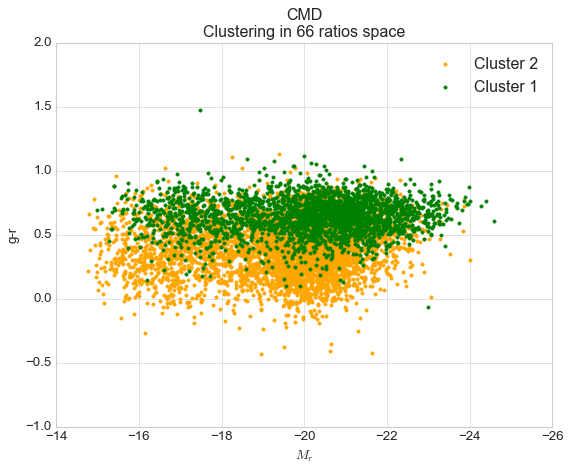

In [416]:
plt.plot(df_galaxies_SN2_normalized['M_r'][df_galaxies_SN2_normalized['Cluster_norm_1'] == -1], df_galaxies_SN2_normalized['color_gr'][df_galaxies_SN2_normalized['Cluster_norm_1'] ==-1], '.', label='Cluster 2', color='orange')
plt.plot(df_galaxies_SN2_normalized['M_r'][df_galaxies_SN2_normalized['Cluster_norm_1'] >= 0], df_galaxies_SN2_normalized['color_gr'][df_galaxies_SN2_normalized['Cluster_norm_1'] >=0], '.', label='Cluster 1', color='green')
#plt.plot(df_galaxies_SN2_normalized['M_r'][df_galaxies_SN2_normalized['Cluster_norm_1'] == 5], df_galaxies_SN2_normalized['color_gr'][df_galaxies_SN2_normalized['Cluster_norm_1'] == 5], 'o', label='5')
plt.legend()
plt.ylim(-1, 2)
plt.xlim(-14,-26)
plt.title('CMD\nClustering in 66 ratios space')
plt.ylabel('g-r')
plt.xlabel('$M_r$')


In [158]:
df_galaxies_SN2_normalized

specObjId  color_gr        M_r         z  ratio_G4300/Ca4227  \
0     1890442071513262080   0.30752 -20.203112  0.504029            0.083616   
1     1515512174368286720   0.13382 -17.908267  0.158843            0.013982   
2     1849999284963928064   0.43996 -21.099340  0.658958            1.000000   
3     1523417392472942592   0.28312 -16.768334  0.110968            0.125885   
4     2246201432648738816   0.76979 -21.598137  0.571130            0.221052   
...                   ...       ...        ...       ...                 ...   
7062  1488512841194432512   0.78874 -20.937059  0.511674            0.350811   
7063  1882603658336561152   0.40278 -22.211737  0.927883           -0.014457   
7064  2030104529202079744   0.65913 -21.198740  0.875138            0.787202   
7065  1634949103702009856   0.62324 -15.970827  0.072282            0.154714   
7066  1615838490153478144   0.46619 -18.113416  0.114281            0.117821   

      ratio_Fe4383/Ca4227  ratio_Fe4383/G4300  ratio_Mg1/Ca4227  \
0                0.374453            0.779122          0.241287   
1                0.129181            1.000000          0.195832   
2                1.000000            0.297285          0.446452   
3                0.220140            0.304245          0.171528   
4                0.241290            0.189908          0.339124   
...                   ...                 ...               ...   
7062             0.253231            0.125586          0.104808   
7063             0.239746           -2.885158          0.058462   
7064             0.794636            0.175623          0.606880   
7065             0.101921            0.114613          0.068164   
7066             0.090806            0.134088          0.176873   

      ratio_Mg1/G4300  ratio_Mg1/Fe4383  ratio_Mg2/Ca4227  ratio_Mg2/G4300  \
0            0.546545          0.222527          0.333208         0.610755   
1            1.000000          0.523516          0.145362         1.000000   
2            0.048161          0.051391          1.000000         0.300939   
3            0.258072          0.269080          0.142797         0.173855   
4            0.290568          0.485362          0.312545         0.216701   
...               ...               ...               ...              ...   
7062         0.056585          0.142930          0.235550         0.102908   
7063        -0.765901          0.084210          0.196719        -2.085486   
7064         0.146015          0.263743          1.000000         0.244776   
7065         0.083447          0.230961          0.115152         0.114074   
7066         0.284329          0.672660          0.257948         0.335545   

      ratio_Mg2/Fe4383  ratio_Mg2/Mg1  ratio_Mg_b/Ca4227  ratio_Mg_b/G4300  \
0             0.333109       0.318489           0.354998          0.651434   
1             0.421231       0.171191           0.109903          1.000000   
2             0.430161       1.000000           1.000000          0.466429   
3             0.242822       0.191998           0.172133          0.209809   
4             0.484889       0.212553           0.259317          0.180000   
...                ...            ...                ...               ...   
7062          0.348205       0.518323           0.193691          0.084717   
7063          0.307159       0.776047           0.250903         -2.662929   
7064          0.592262       0.477775           1.000000          0.248453   
7065          0.422941       0.389611           0.078553          0.077906   
7066          1.000000       0.336343           0.266605          0.347201   

      ratio_Mg_b/Fe4383  ratio_Mg_b/Mg1  ratio_Mg_b/Mg2  ratio_Fe5270/Ca4227  \
0              0.321110        0.291646        0.490362             0.385547   
1              0.288163        0.111248        0.347991             0.041442   
2              0.602564        1.000000        0.712560             1.000000   
3              0.264845        0.198928        0.554821 

/var/folders/0s/_xxgbjs554192y_2w2mspv3c0000gn/T/ipykernel_3142/3482207782.py:118: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


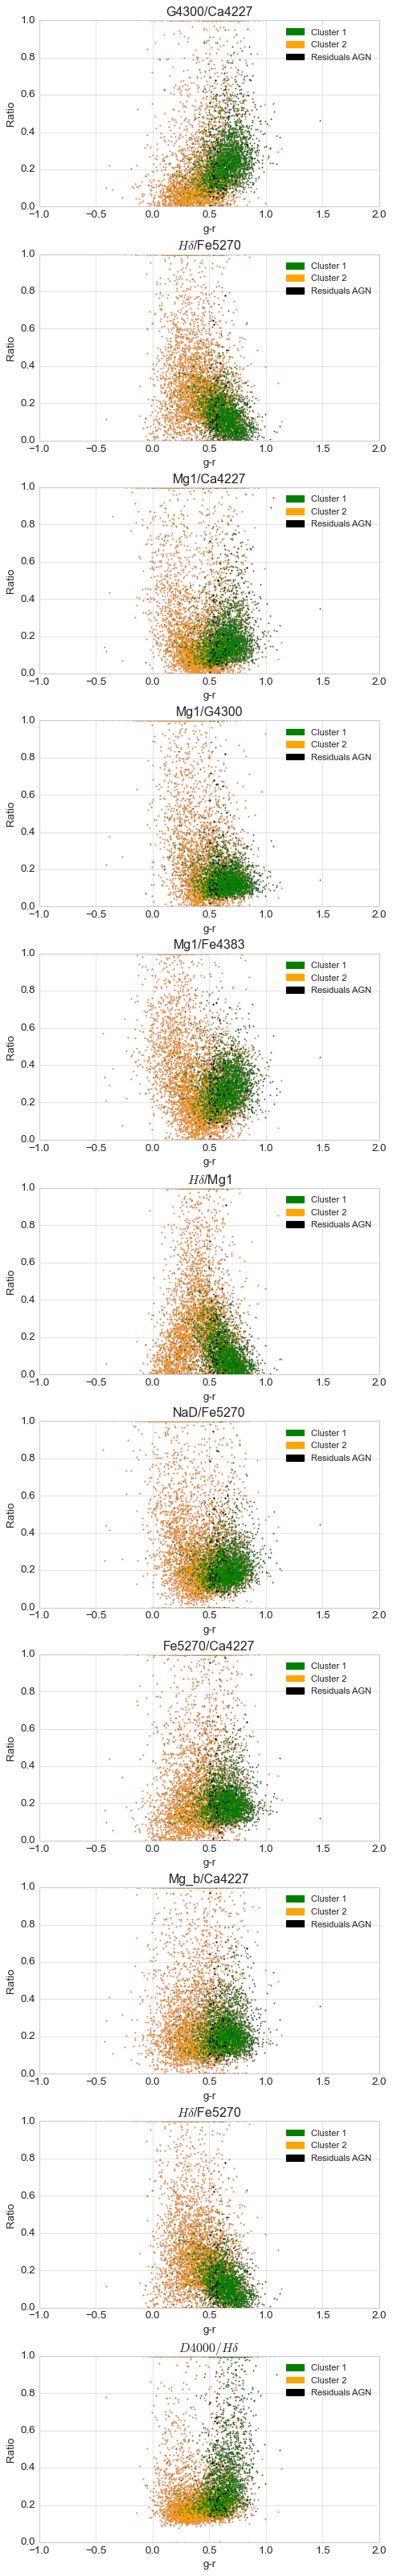

In [341]:
#### Cocientes interesantes a revisar ####
   
fig, axs = plt.subplots(11, 1, figsize=(6, 40), constrained_layout=True)  

#x = df_galaxies['color_gr'] # SN > 5
x_1 = df_galaxies_SN2_normalized['color_gr'] # SN > 2


axs[0].scatter(x_1, df_galaxies_SN2_normalized['ratio_G4300/Ca4227'], s=0.2, color='purple')
axs[0].scatter(x_1[df_galaxies_SN2_normalized['Cluster_norm_1']==-1], df_galaxies_SN2_normalized['ratio_G4300/Ca4227'][df_galaxies_SN2_normalized['Cluster_norm_1']==-1], s=0.2, color='orange')
axs[0].scatter(x_1[df_galaxies_SN2_normalized['Cluster_norm_1']>=0], df_galaxies_SN2_normalized['ratio_G4300/Ca4227'][df_galaxies_SN2_normalized['Cluster_norm_1']>=0], s=0.2, color='green')
axs[0].scatter(residual_galaxies['color_gr'], residual_galaxies['ratio_G4300/Ca4227'], s=0.8, color='black')
axs[0].set_title('G4300/Ca4227')
p5, p95 = np.nanpercentile(df_galaxies_SN2_normalized['ratio_G4300/Ca4227'], [1, 99.5])
#axs[0].set_ylim(p5 - 0.1 * (p95 - p5), p95 + 0.1 * (p95 - p5))  # Extend limits slightly

axs[0].set_ylim(0, 1)


axs[1].scatter(x_1, df_galaxies_SN2_normalized['ratio_Hd/Fe5270'], s=0.2, color='purple')
axs[1].scatter(x_1[df_galaxies_SN2_normalized['Cluster_norm_1']==-1], df_galaxies_SN2_normalized['ratio_Hd/Fe5270'][df_galaxies_SN2_normalized['Cluster_norm_1']==-1], s=0.2, color='orange')
axs[1].scatter(x_1[df_galaxies_SN2_normalized['Cluster_norm_1']>=0], df_galaxies_SN2_normalized['ratio_Hd/Fe5270'][df_galaxies_SN2_normalized['Cluster_norm_1']>=0], s=0.2, color='green')
axs[1].scatter(residual_galaxies['color_gr'], residual_galaxies['ratio_Hd/Fe5270'], s=0.8, color='black')
axs[1].set_title(r'$H\delta$/Fe5270')
p5, p95 = np.nanpercentile(df_galaxies_SN2_normalized['ratio_Hd/Fe5270'], [1, 99.5])
#axs[1].set_ylim(p5 - 0.1 * (p95 - p5), p95 + 0.1 * (p95 - p5))  # Extend limits slightly

axs[1].set_ylim(0, 1)


axs[2].scatter(x_1, df_galaxies_SN2_normalized['ratio_Mg1/Ca4227'], s=0.2, color='purple')
axs[2].scatter(x_1[df_galaxies_SN2_normalized['Cluster_norm_1']==-1], df_galaxies_SN2_normalized['ratio_Mg1/Ca4227'][df_galaxies_SN2_normalized['Cluster_norm_1']==-1], s=0.2, color='orange')
axs[2].scatter(x_1[df_galaxies_SN2_normalized['Cluster_norm_1']>=0], df_galaxies_SN2_normalized['ratio_Mg1/Ca4227'][df_galaxies_SN2_normalized['Cluster_norm_1']>=0], s=0.2, color='green')
axs[2].scatter(residual_galaxies['color_gr'], residual_galaxies['ratio_Mg1/Ca4227'], s=0.8, color='black')
axs[2].set_title('Mg1/Ca4227')
p5, p95 = np.nanpercentile(df_galaxies_SN2_normalized['ratio_Mg1/Ca4227'], [1, 99.5])
#axs[2].set_ylim(p5 - 0.1 * (p95 - p5), p95 + 0.1 * (p95 - p5))  # Extend limits slightly

axs[2].set_ylim(0, 1)

axs[3].scatter(x_1, df_galaxies_SN2_normalized['ratio_Mg1/G4300'], s=0.2, color='purple')
axs[3].scatter(x_1[df_galaxies_SN2_normalized['Cluster_norm_1']==-1], df_galaxies_SN2_normalized['ratio_Mg1/G4300'][df_galaxies_SN2_normalized['Cluster_norm_1']==-1], s=0.2, color='orange')
axs[3].scatter(x_1[df_galaxies_SN2_normalized['Cluster_norm_1']>=0], df_galaxies_SN2_normalized['ratio_Mg1/G4300'][df_galaxies_SN2_normalized['Cluster_norm_1']>=0], s=0.2, color='green')
axs[3].scatter(residual_galaxies['color_gr'], residual_galaxies['ratio_Mg1/G4300'], s=0.8, color='black')
axs[3].set_title('Mg1/G4300')
p5, p95 = np.nanpercentile(df_galaxies_SN2_normalized['ratio_Mg1/G4300'], [1, 99.5])
#axs[3].set_ylim(p5 - 0.1 * (p95 - p5), p95 + 0.1 * (p95 - p5))  # Extend limits slightly
axs[3].set_ylim(0, 1)

axs[4].scatter(x_1, df_galaxies_SN2_normalized['ratio_Mg1/Fe4383'], s=0.2, color='purple')
axs[4].scatter(x_1[df_galaxies_SN2_normalized['Cluster_norm_1']==-1], df_galaxies_SN2_normalized['ratio_Mg1/Fe4383'][df_galaxies_SN2_normalized['Cluster_norm_1']==-1], s=0.2, color='orange')
axs[4].scatter(x_1[df_galaxies_SN2_normalized['Cluster_norm_1']>=0], df_galaxies_SN2_normalized['ratio_Mg1/Fe4383'][df_galaxies_SN2_normalized['Cluster_norm_1']>=0], s=0.2, color='green')
axs[4].scatter(residual_galaxies['color_gr'], residual_galaxies['ratio_Mg1/Fe4383'], s=0.8, color='black')
axs[4].set_title('Mg1/Fe4383')
p5, p95 = np.nanpercentile(df_galaxies_SN2_normalized['ratio_Mg1/Fe4383'], [1, 99.5])
#axs[4].set_ylim(p5 - 0.1 * (p95 - p5), p95 + 0.1 * (p95 - p5))  # Extend limits slightly
axs[4].set_ylim(0, 1)

axs[5].scatter(x_1, df_galaxies_SN2_normalized['ratio_Hd/Mg1'], s=0.2, color='purple')
axs[5].scatter(x_1[df_galaxies_SN2_normalized['Cluster_norm_1']==-1], df_galaxies_SN2_normalized['ratio_Hd/Mg1'][df_galaxies_SN2_normalized['Cluster_norm_1']==-1], s=0.2, color='orange')
axs[5].scatter(x_1[df_galaxies_SN2_normalized['Cluster_norm_1']>=0], df_galaxies_SN2_normalized['ratio_Hd/Mg1'][df_galaxies_SN2_normalized['Cluster_norm_1']>=0], s=0.2, color='green')
axs[5].scatter(residual_galaxies['color_gr'], residual_galaxies['ratio_Hd/Mg1'], s=0.8, color='black')
axs[5].set_title(r'$H\delta$/Mg1')
p5, p95 = np.nanpercentile(df_galaxies_SN2_normalized['ratio_Hd/Mg1'], [1, 99.5])
#axs[5].set_ylim(p5 - 0.1 * (p95 - p5), p95 + 0.1 * (p95 - p5))  # Extend limits slightly
axs[5].set_ylim(0, 1)

axs[6].scatter(x_1, df_galaxies_SN2_normalized['ratio_NaD/Fe5270'] , s=0.2, color='purple')
axs[6].scatter(x_1[df_galaxies_SN2_normalized['Cluster_norm_1']==-1], df_galaxies_SN2_normalized['ratio_NaD/Fe5270'][df_galaxies_SN2_normalized['Cluster_norm_1']==-1], s=0.2, color='orange')
axs[6].scatter(x_1[df_galaxies_SN2_normalized['Cluster_norm_1']>=0], df_galaxies_SN2_normalized['ratio_NaD/Fe5270'][df_galaxies_SN2_normalized['Cluster_norm_1']>=0], s=0.2, color='green')
axs[6].scatter(residual_galaxies['color_gr'], residual_galaxies['ratio_NaD/Fe5270'], s=0.8, color='black')
axs[6].set_title('NaD/Fe5270')
p5, p95 = np.nanpercentile(df_galaxies_SN2_normalized['ratio_NaD/Fe5270'], [1, 99.5])
#axs[6].set_ylim(p5 - 0.1 * (p95 - p5), p95 + 0.1 * (p95 - p5))  # Extend limits slightly
axs[6].set_ylim(0, 1)

axs[7].scatter(x_1, df_galaxies_SN2_normalized['ratio_Fe5270/Ca4227'] , s=0.2, color='purple')
axs[7].scatter(x_1[df_galaxies_SN2_normalized['Cluster_norm_1']==-1], df_galaxies_SN2_normalized['ratio_Fe5270/Ca4227'][df_galaxies_SN2_normalized['Cluster_norm_1']==-1], s=0.2, color='orange')
axs[7].scatter(x_1[df_galaxies_SN2_normalized['Cluster_norm_1']>=0], df_galaxies_SN2_normalized['ratio_Fe5270/Ca4227'][df_galaxies_SN2_normalized['Cluster_norm_1']>=0], s=0.2, color='green')
axs[7].scatter(residual_galaxies['color_gr'], residual_galaxies['ratio_Fe5270/Ca4227'], s=0.8, color='black')
axs[7].set_title('Fe5270/Ca4227')
p5, p95 = np.nanpercentile(df_galaxies_SN2_normalized['ratio_Fe5270/Ca4227'], [1, 99.5])
#axs[7].set_ylim(p5 - 0.1 * (p95 - p5), p95 + 0.1 * (p95 - p5))  # Extend limits slightly
axs[7].set_ylim(0, 1)

axs[8].scatter(x_1, df_galaxies_SN2_normalized['ratio_Mg_b/Ca4227'] , s=0.2, color='purple')
axs[8].scatter(x_1[df_galaxies_SN2_normalized['Cluster_norm_1']==-1], df_galaxies_SN2_normalized['ratio_Mg_b/Ca4227'][df_galaxies_SN2_normalized['Cluster_norm_1']==-1], s=0.2, color='orange')
axs[8].scatter(x_1[df_galaxies_SN2_normalized['Cluster_norm_1']>=0], df_galaxies_SN2_normalized['ratio_Mg_b/Ca4227'][df_galaxies_SN2_normalized['Cluster_norm_1']>=0], s=0.2, color='green')
axs[8].scatter(residual_galaxies['color_gr'], residual_galaxies['ratio_Mg_b/Ca4227'], s=0.8, color='black')
axs[8].set_title('Mg_b/Ca4227')
p5, p95 = np.nanpercentile(df_galaxies_SN2_normalized['ratio_Mg_b/Ca4227'], [1, 99.5])
#axs[8].set_ylim(p5 - 0.1 * (p95 - p5), p95 + 0.1 * (p95 - p5))  # Extend limits slightly
axs[8].set_ylim(0, 1)

axs[9].scatter(x_1, df_galaxies_SN2_normalized['ratio_Hd/Fe5270'] , s=0.2, color='purple')
axs[9].scatter(x_1[df_galaxies_SN2_normalized['Cluster_norm_1']==-1], df_galaxies_SN2_normalized['ratio_Hd/Fe5270'][df_galaxies_SN2_normalized['Cluster_norm_1']==-1], s=0.2, color='orange')
axs[9].scatter(x_1[df_galaxies_SN2_normalized['Cluster_norm_1']>=0], df_galaxies_SN2_normalized['ratio_Hd/Fe5270'][df_galaxies_SN2_normalized['Cluster_norm_1']>=0], s=0.2, color='green')
axs[9].scatter(residual_galaxies['color_gr'], residual_galaxies['ratio_Hd/Fe5270'], s=0.8, color='black')
axs[9].set_title(r'$H\delta$/Fe5270')
p5, p95 = np.nanpercentile(df_galaxies_SN2_normalized['ratio_Hd/Fe5270'], [1, 99.5])
#axs[9].set_ylim(p5 - 0.1 * (p95 - p5), p95 + 0.1 * (p95 - p5))  # Extend limits slightly
axs[9].set_ylim(0, 1)

axs[10].scatter(x_1, df_galaxies_SN2_normalized['ratio_D4000/Hd'] , s=0.2, color='purple')
axs[10].scatter(x_1[df_galaxies_SN2_normalized['Cluster_norm_1']==-1], df_galaxies_SN2_normalized['ratio_D4000/Hd'][df_galaxies_SN2_normalized['Cluster_norm_1']==-1], s=0.2, color='orange')
axs[10].scatter(x_1[df_galaxies_SN2_normalized['Cluster_norm_1']>=0], df_galaxies_SN2_normalized['ratio_D4000/Hd'][df_galaxies_SN2_normalized['Cluster_norm_1']>=0], s=0.2, color='green')
axs[10].scatter(residual_galaxies['color_gr'], residual_galaxies['ratio_D4000/Hd'], s=0.8, color='black')
axs[10].set_title(r'$D4000/H\delta$')
p5, p95 = np.nanpercentile(df_galaxies_SN2_normalized['ratio_D4000/Hd'], [1, 99.5])
#axs[10].set_ylim(p5 - 0.1 * (p95 - p5), p95 + 0.1 * (p95 - p5))  # Extend limits slightly
axs[10].set_ylim(0, 1)


for ax in axs:
    ax.set_xlabel('g-r')
    ax.set_ylabel('Ratio')

plt.style.use('seaborn-whitegrid')
legend_handles = [mpatches.Patch(color='green', label='Cluster 1'),
                  mpatches.Patch(color='orange', label='Cluster 2'),
                  mpatches.Patch(color='black', label='Residuals AGN')]

for ax in axs:
    ax.set_xlabel('g-r')
    ax.set_ylabel('Ratio')
    ax.legend(handles=legend_handles, loc='upper right', prop={'size': 10})

plt.show()

## Subclusters

In [279]:
secuencia_roja = df_galaxies_SN2_normalized.loc[df_galaxies_SN2_normalized['Cluster_norm_1'] >= 0]
secuencia_azul = df_galaxies_SN2_normalized.loc[df_galaxies_SN2_normalized['Cluster_norm_1'] == -1]

In [280]:
#Comparacion con los clusters de las lineas de emision:

rojas_emision = pd.read_csv('subclusters_secuencia_roja.csv')
azules_emision = pd.read_csv('subclusters_secuencia_azul.csv')



In [281]:
secuencia_roja.set_index('specObjId', inplace=True)
rojas_emision.set_index('specObjId', inplace=True)

common_galaxies = secuencia_roja.index.intersection(rojas_emision.index)

num_common = len(common_galaxies)
total_secuencia_roja = len(secuencia_roja)
total_rojas_emision = len(rojas_emision)

percentage_common = (num_common / total_secuencia_roja) * 100
print(f"Common galaxies: {num_common}")
print(f"Percentage of secuencia_roja galaxies in rojas_emision: {percentage_common:.2f}%")


Common galaxies: 2198
Percentage of secuencia_roja galaxies in rojas_emision: 85.29%


In [317]:
common_data = secuencia_roja.loc[common_galaxies]
only_secuencia_roja = secuencia_roja.drop(common_galaxies)
only_rojas_emision = rojas_emision.drop(common_galaxies)

plt.figure(figsize=(8, 6))

plt.scatter(rojas_emision['M_r'], rojas_emision['color_gr'], 
            color='blue', label='Red in emission', alpha=0.5, s=10)
plt.scatter(secuencia_roja['M_r'], secuencia_roja['color_gr'], 
            color='green', label='Red in absorption', alpha=0.6, s=10)

#plt.scatter(common_data['M_r'], common_data['color_gr'], 
            #color='red', label='Common Galaxies', alpha=0.8, s=20, edgecolor='black')

plt.xlabel(r'$M_r$')
plt.ylabel(r'$g-r$ ')
plt.title('Color-Magnitude Diagram')
plt.gca().invert_xaxis()  
plt.legend(loc='upper right', size= 8)
plt.grid(True, linestyle='--', linewidth=0.5)

plt.show()


KeyError: "None of [Int64Index([1890442071513262080, 1515512174368286720, 1523417392472942592,\n            2019922782556547072, 2246275099927799808, 1889289788092082176,\n            1532519424001599488, 1545920546867275776, 1387198616124286976,\n            2035671906731976704,\n            ...\n            2224878053660583936, 2060540117415651328, 1611200750040410112,\n            1624724194363205632, 1811673608137762816, 1514435477472569344,\n            1880332910284793856, 2048127455436236800, 1910798154794559488,\n            1914142875206051840],\n           dtype='int64', name='specObjId', length=2780)] are in the [index]"

In [285]:
secuencia_azul.set_index('specObjId', inplace=True)
azules_emision.set_index('specObjId', inplace=True)

common_galaxies = secuencia_azul.index.intersection(azules_emision.index)

num_common = len(common_galaxies)
total_secuencia_azul = len(secuencia_azul)
total_azuls_emision = len(azules_emision)

percentage_common = (num_common / total_secuencia_azul) * 100
print(f"Common galaxies: {num_common}")
print(f"Percentage of secuencia_azul galaxies in azules_emision: {percentage_common:.2f}%")


Common galaxies: 2780
Percentage of secuencia_azul galaxies in azules_emision: 61.92%


In [356]:
secuencia_azul.index

Int64Index([1890442071513262080, 1515512174368286720, 1849999284963928064,
            1523417392472942592, 1848768656104777728, 2019922782556547072,
            1544896626647132160, 2246275099927799808, 1889289788092082176,
            1532519424001599488,
            ...
            2048127455436236800, 1910798154794559488, 1464860150161500160,
            2351006607439063040, 1914142875206051840, 2246210228741761024,
            1488512841194432512, 1882603658336561152, 2030104529202079744,
            1615838490153478144],
           dtype='int64', name='specObjId', length=4490)

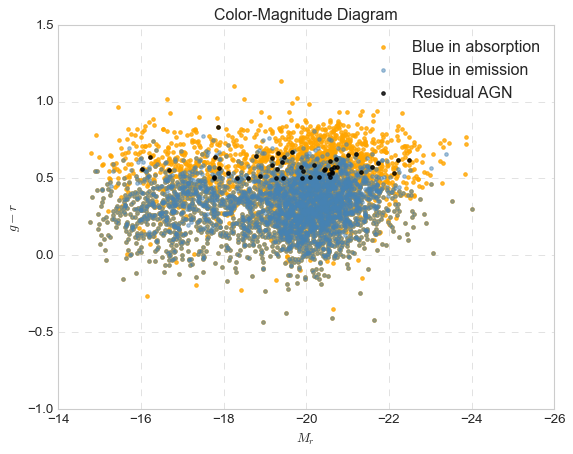

In [359]:
common_data = secuencia_azul.loc[common_galaxies]
only_secuencia_azul = secuencia_azul.drop(common_galaxies)
only_azuls_emision = azules_emision.drop(common_galaxies)

plt.figure(figsize=(8, 6))


plt.scatter(secuencia_azul['M_r'], secuencia_azul['color_gr'], 
            color='orange', label='Blue in absorption', alpha=0.8, s=10)
matching_indices = secuencia_azul.index.isin(merged_df['specObjId'][residuales_AGN])

# Now use these indices to filter 'secuencia_azul' before plotting

#plt.scatter(common_data['M_r'], common_data['color_gr'], 
            #color='red', label='Common Galaxies', alpha=0.5, s=20, edgecolor='black')

plt.scatter(azules_emision['M_r'], azules_emision['color_gr'], 
            color='steelblue', label='Blue in emission', alpha=0.5, s=10)

plt.scatter(secuencia_azul.loc[matching_indices, 'M_r'], 
            secuencia_azul.loc[matching_indices, 'color_gr'], 
            color='black', label='Residual AGN', alpha=0.8, s=10)

plt.xlabel(r'$M_r$ ')
plt.ylabel(r'$g-r$ ')
plt.title('Color-Magnitude Diagram')
plt.gca().invert_xaxis()  
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)


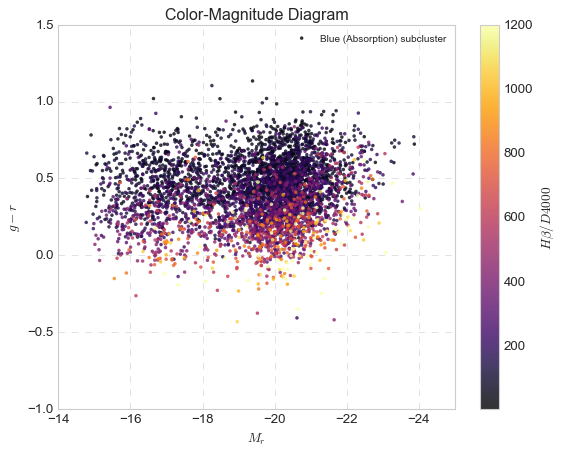

In [395]:
#color_ratio = secuencia_azul['ratio_D4000/Hd']
mask_1 = merged_df['specObjId'].isin(secuencia_azul.index)
color_ratio = merged_df.loc[mask_1, 'h_beta_flux'] / merged_df.loc[mask_1, 'd4000_n']

#(only positive values)
#mask = color_ratio > 0
x_data = secuencia_azul['M_r']#[mask] 
y_data = secuencia_azul['color_gr']
filtered_color_ratio = color_ratio.values #[mask].values  # Convert to NumPy array for sorting

#Sort points based on color_ratio for better visibility
sort_idx = np.argsort(filtered_color_ratio)  # Sorting indices
x_sorted = x_data.values[sort_idx]
y_sorted = y_data.values[sort_idx]
color_sorted = filtered_color_ratio[sort_idx]

plt.figure(figsize=(8, 6))

sc = plt.scatter(x_sorted, y_sorted, c=color_sorted, cmap='inferno', alpha=0.8, s=10, edgecolors='none', vmax=1200, label='Blue (Absorption) subcluster')

cbar = plt.colorbar(sc)
cbar.set_label(r'$ H\beta / D4000$')

plt.xlabel(r'$M_r$ ')
plt.ylabel(r'$g-r$ ')
plt.title('Color-Magnitude Diagram')
plt.xlim(-25,-14)
#plt.ylim(-0.5, 1.2)
plt.gca().invert_xaxis()  
plt.legend(loc='upper right', prop={'size': 9})
plt.grid(True, linestyle='--', linewidth=0.5)

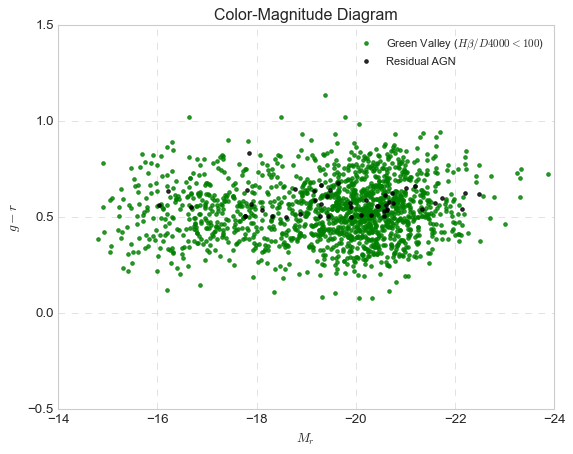

In [408]:
mask_1 = merged_df['specObjId'].isin(secuencia_azul.index)

color_ratio = (merged_df.loc[mask_1, 'h_beta_flux'] / merged_df.loc[mask_1, 'd4000_n']).dropna()
color_ratio.index = merged_df.loc[mask_1, 'specObjId']  # Ensure index is specObjId

valid_ids = color_ratio[color_ratio <100].index  
filtered_data = secuencia_azul.loc[valid_ids]

x_data = filtered_data['M_r']
y_data = filtered_data['color_gr']

plt.figure(figsize=(8, 6))

plt.scatter(x_data, y_data, color='green', alpha=0.8, s=10, label=r'Green Valley ($H\beta/D4000 < 100$)')
plt.scatter(secuencia_azul.loc[matching_indices, 'M_r'], 
            secuencia_azul.loc[matching_indices, 'color_gr'], 
            color='black', label='Residual AGN', alpha=0.8, s=10)

plt.xlabel(r'$M_r$ ')
plt.ylabel(r'$g-r$ ')
plt.title('Color-Magnitude Diagram')
plt.xlim(-24, -14)
plt.ylim(-0.5,1.5)
plt.gca().invert_xaxis()

plt.legend(loc='upper right', prop={'size': 10})
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()



In [410]:
x_data

specObjId
2019922782556547072   -17.172549
1889289788092082176   -21.412147
2203479083717781504   -20.518061
1139575402033866752   -15.852875
1829643476392765440   -19.635799
                         ...    
1933208962979620864   -19.463698
1880332910284793856   -20.394296
2246210228741761024   -21.087781
1488512841194432512   -20.937059
2030104529202079744   -21.198740
Name: M_r, Length: 1543, dtype: float64

66

In [409]:
matching_specObjIds = secuencia_azul.index[matching_indices]  # Get the index (which is specObjId)

common_ids = set(matching_specObjIds).intersection(set(valid_ids))
num_common = len(common_ids)

print(f"Number of Residual AGN in the Green Valley sample: {num_common}")


Number of Residual AGN in the Green Valley sample: 6


In [242]:
ratios_roja = ratios_data_norm.loc[df_galaxies_SN2_normalized['Cluster_norm_1'] >= 0]
ratios_roja

ratios_azul = ratios_data_norm.loc[df_galaxies_SN2_normalized['Cluster_norm_1'] == -1]
ratios_azul

ratio_G4300/Ca4227  ratio_Fe4383/Ca4227  ratio_Fe4383/G4300  \
0               0.083616             0.374453            0.779122   
1               0.013982             0.129181            1.000000   
2               1.000000             1.000000            0.297285   
3               0.125885             0.220140            0.304245   
5               0.040738            -0.120384           -0.514121   
...                  ...                  ...                 ...   
7060            0.336518             0.478581            0.247426   
7062            0.350811             0.253231            0.125586   
7063           -0.014457             0.239746           -2.885158   
7064            0.787202             0.794636            0.175623   
7066            0.117821             0.090806            0.134088   

      ratio_Mg1/Ca4227  ratio_Mg1/G4300  ratio_Mg1/Fe4383  ratio_Mg2/Ca4227  \
0             0.241287         0.546545          0.222527          0.333208   
1             0.195832         1.000000          0.523516          0.145362   
2             0.446452         0.048161          0.051391          1.000000   
3             0.171528         0.258072          0.269080          0.142797   
5            -0.403575        -1.876306          1.000000         -0.268297   
...                ...              ...               ...               ...   
7060          0.071027         0.039976          0.051252          0.343366   
7062          0.104808         0.056585          0.142930          0.235550   
7063          0.058462        -0.765901          0.084210          0.196719   
7064          0.606880         0.146015          0.263743          1.000000   
7066          0.176873         0.284329          0.672660          0.257948   

      ratio_Mg2/G4300  ratio_Mg2/Fe4383  ratio_Mg2/Mg1  ratio_Mg_b/Ca4227  \
0            0.610755          0.333109       0.318489           0.354998   
1            1.000000          0.421231       0.171191           0.109903   
2            0.300939          0.430161       1.000000           1.000000   
3            0.173855          0.242822       0.191998           0.172133   
5           -1.009383          0.834287       0.153322          -0.200611   
...               ...               ...            ...                ...   
7060         0.156383          0.268578       1.000000           0.322360   
7062         0.102908          0.348205       0.518323           0.193691   
7063        -2.085486          0.307159       0.776047           0.250903   
7064         0.244776          0.592262       0.477775           1.000000   
7066         0.335545          1.000000       0.336343           0.266605   

      ratio_Mg_b/G4300  ratio_Mg_b/Fe4383  ratio_Mg_b/Mg1  ratio_Mg_b/Mg2  \
0             0.651434           0.321110        0.291646        0.490362   
1             1.000000           0.288163        0.111248        0.347991   
2             0.466429           0.602564        1.000000        0.712560   
3             0.209809           0.264845        0.198928        0.554821   
5            -0.755594           0.564433        0.098536        0.344149   
...                ...                ...             ...             ...   
7060          0.146983           0.228145        0.899669        0.432106   
7062          0.084717           0.259071        0.366335        0.378472   
7063         -2.662929           0.354470        0.850743        0.587038   
7064          0.248453           0.543318        0.416349        0.466648   
7066          0.347201           0.994449        0.298794        0.475712   

      ratio_Fe5270/Ca4227  ratio_Fe5270/G4300  ratio_Fe5270/Fe4383  \
0                0.385547            0.753668             0.327782   
1                0.041442            0.484455             0.102128   
2                1.000000            0.298189             0.339884   
3                0.119759            0.155498             0.173186   
5               -0.141992   

In [174]:
#### Calculo de l para cada grupo
### Volumen minimo homogeneo

max = np.zeros(len(ratio_columns))

for i in range(len(ratio_columns)):
    max[i]= np.max(ratios_data_norm[ratio_columns[i]])

  
vol = np.prod(max)

l = (vol/7067)**(1.0/len(max))

### Para cada grupo
l_azul = (1.0/len(secuencia_azul))**(1.0/82)
l_roja = (1.0/len(secuencia_roja))**(1.0/82)

print('l secuencia azul:', l_azul, '\nl secuencia roja:', l_roja)

l secuencia azul: 0.9025274309008496 
l secuencia roja: 0.908659232602937


In [235]:
#Aplicar DBSCAN en el espacio de características de cocientes
dbscan = DBSCAN(eps=0.9*l_azul, min_samples=8)
clusters = dbscan.fit_predict(ratios_azul)

secuencia_azul['Cluster_1'] = clusters

cluster_counts = secuencia_azul['Cluster_1'].value_counts()
print("Conteo de galaxias por cluster:\n", cluster_counts)


Conteo de galaxias por cluster:
 -1     4285
 2       64
 4       21
 0       20
 5       18
 9       18
 1       17
 3       13
 6       10
 7        8
 10       8
 8        8
Name: Cluster_1, dtype: int64


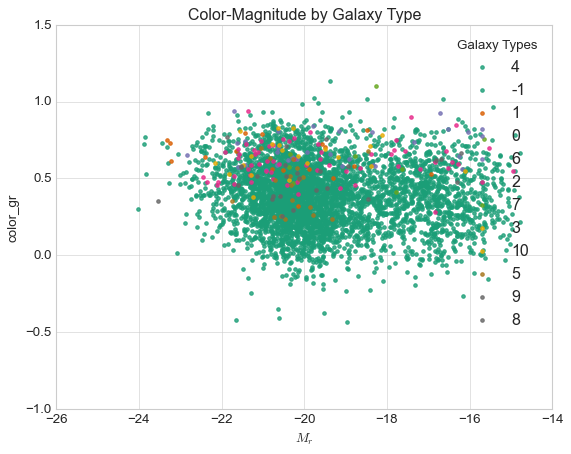

Text(0.5, 0, '$M_r$')

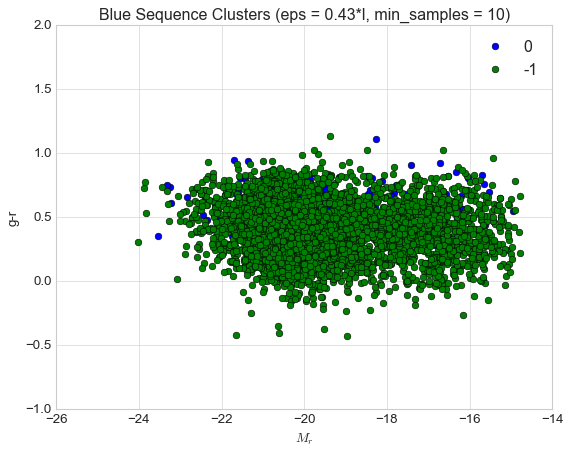

In [236]:
graficos.color_Mag_by_label(secuencia_azul, 'color_gr', label_column='Cluster_1')
plt.plot(secuencia_azul['M_r'][secuencia_azul['Cluster_1'] >= 0], secuencia_azul['color_gr'][secuencia_azul['Cluster_1'] >= 0], 'o', label='0')
plt.plot(secuencia_azul['M_r'][secuencia_azul['Cluster_1'] == -1], secuencia_azul['color_gr'][secuencia_azul['Cluster_1'] == -1], 'o', label='-1')

plt.legend()
plt.ylim(-1, 2)
plt.title('Blue Sequence Clusters (eps = 0.43*l, min_samples = 10)')
plt.ylabel('g-r')
plt.xlabel('$M_r$')

/var/folders/0s/_xxgbjs554192y_2w2mspv3c0000gn/T/ipykernel_3142/544141279.py:118: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


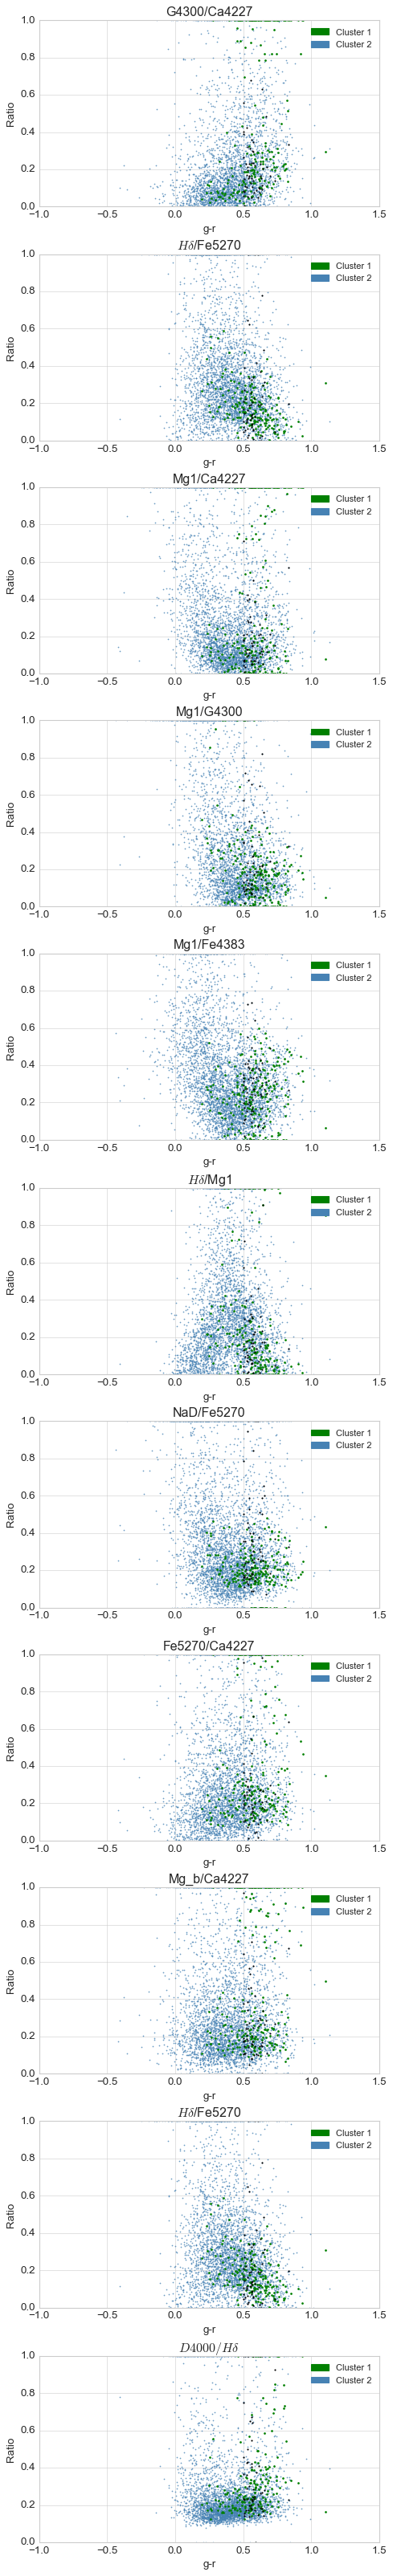

In [252]:
#### Cocientes interesantes a revisar ####
   
fig, axs = plt.subplots(11, 1, figsize=(6, 40), constrained_layout=True)  

#x = df_galaxies['color_gr'] # SN > 5
x_1 = secuencia_azul['color_gr'] # SN > 2


#axs[0].scatter(x_1, secuencia_azul['ratio_G4300/Ca4227'], s=0.2, color='purple')
axs[0].scatter(x_1[secuencia_azul['Cluster_1']==-1], secuencia_azul['ratio_G4300/Ca4227'][secuencia_azul['Cluster_1']==-1], s=0.2, color='steelblue')
axs[0].scatter(x_1[secuencia_azul['Cluster_1']>=0], secuencia_azul['ratio_G4300/Ca4227'][secuencia_azul['Cluster_1']>=0], s=2, color='green')
axs[0].scatter(residual_galaxies['color_gr'], residual_galaxies['ratio_G4300/Ca4227'], s=0.8, color='black')
axs[0].set_title('G4300/Ca4227')
p5, p95 = np.nanpercentile(secuencia_azul['ratio_G4300/Ca4227'], [1, 99.5])
#axs[0].set_ylim(p5 - 0.1 * (p95 - p5), p95 + 0.1 * (p95 - p5))  # Extend limits slightly

axs[0].set_ylim(0, 1)


#axs[1].scatter(x_1, secuencia_azul['ratio_Hd/Fe5270'], s=0.2, color='purple')
axs[1].scatter(x_1[secuencia_azul['Cluster_1']==-1], secuencia_azul['ratio_Hd/Fe5270'][secuencia_azul['Cluster_1']==-1], s=0.2, color='steelblue')
axs[1].scatter(x_1[secuencia_azul['Cluster_1']>=0], secuencia_azul['ratio_Hd/Fe5270'][secuencia_azul['Cluster_1']>=0], s=2, color='green')
axs[1].scatter(residual_galaxies['color_gr'], residual_galaxies['ratio_Hd/Fe5270'], s=0.8, color='black')
axs[1].set_title(r'$H\delta$/Fe5270')
p5, p95 = np.nanpercentile(secuencia_azul['ratio_Hd/Fe5270'], [1, 99.5])
#axs[1].set_ylim(p5 - 0.1 * (p95 - p5), p95 + 0.1 * (p95 - p5))  # Extend limits slightly

axs[1].set_ylim(0, 1)


#axs[2].scatter(x_1, secuencia_azul['ratio_Mg1/Ca4227'], s=0.2, color='purple')
axs[2].scatter(x_1[secuencia_azul['Cluster_1']==-1], secuencia_azul['ratio_Mg1/Ca4227'][secuencia_azul['Cluster_1']==-1], s=0.2, color='steelblue')
axs[2].scatter(x_1[secuencia_azul['Cluster_1']>=0], secuencia_azul['ratio_Mg1/Ca4227'][secuencia_azul['Cluster_1']>=0], s=2, color='green')
axs[2].scatter(residual_galaxies['color_gr'], residual_galaxies['ratio_Mg1/Ca4227'], s=0.8, color='black')
axs[2].set_title('Mg1/Ca4227')
p5, p95 = np.nanpercentile(secuencia_azul['ratio_Mg1/Ca4227'], [1, 99.5])
#axs[2].set_ylim(p5 - 0.1 * (p95 - p5), p95 + 0.1 * (p95 - p5))  # Extend limits slightly

axs[2].set_ylim(0, 1)

#axs[3].scatter(x_1, secuencia_azul['ratio_Mg1/G4300'], s=0.2, color='purple')
axs[3].scatter(x_1[secuencia_azul['Cluster_1']==-1], secuencia_azul['ratio_Mg1/G4300'][secuencia_azul['Cluster_1']==-1], s=0.2, color='steelblue')
axs[3].scatter(x_1[secuencia_azul['Cluster_1']>=0], secuencia_azul['ratio_Mg1/G4300'][secuencia_azul['Cluster_1']>=0], s=2, color='green')
axs[3].scatter(residual_galaxies['color_gr'], residual_galaxies['ratio_Mg1/G4300'], s=0.8, color='black')
axs[3].set_title('Mg1/G4300')
p5, p95 = np.nanpercentile(secuencia_azul['ratio_Mg1/G4300'], [1, 99.5])
#axs[3].set_ylim(p5 - 0.1 * (p95 - p5), p95 + 0.1 * (p95 - p5))  # Extend limits slightly
axs[3].set_ylim(0, 1)

#axs[4].scatter(x_1, secuencia_azul['ratio_Mg1/Fe4383'], s=0.2, color='purple')
axs[4].scatter(x_1[secuencia_azul['Cluster_1']==-1], secuencia_azul['ratio_Mg1/Fe4383'][secuencia_azul['Cluster_1']==-1], s=0.2, color='steelblue')
axs[4].scatter(x_1[secuencia_azul['Cluster_1']>=0], secuencia_azul['ratio_Mg1/Fe4383'][secuencia_azul['Cluster_1']>=0], s=2, color='green')
axs[4].scatter(residual_galaxies['color_gr'], residual_galaxies['ratio_Mg1/Fe4383'], s=0.8, color='black')
axs[4].set_title('Mg1/Fe4383')
p5, p95 = np.nanpercentile(secuencia_azul['ratio_Mg1/Fe4383'], [1, 99.5])
#axs[4].set_ylim(p5 - 0.1 * (p95 - p5), p95 + 0.1 * (p95 - p5))  # Extend limits slightly
axs[4].set_ylim(0, 1)

#axs[5].scatter(x_1, secuencia_azul['ratio_Hd/Mg1'], s=0.2, color='purple')
axs[5].scatter(x_1[secuencia_azul['Cluster_1']==-1], secuencia_azul['ratio_Hd/Mg1'][secuencia_azul['Cluster_1']==-1], s=0.2, color='steelblue')
axs[5].scatter(x_1[secuencia_azul['Cluster_1']>=0], secuencia_azul['ratio_Hd/Mg1'][secuencia_azul['Cluster_1']>=0], s=2, color='green')
axs[5].scatter(residual_galaxies['color_gr'], residual_galaxies['ratio_Hd/Mg1'], s=0.8, color='black')
axs[5].set_title(r'$H\delta$/Mg1')
p5, p95 = np.nanpercentile(secuencia_azul['ratio_Hd/Mg1'], [1, 99.5])
#axs[5].set_ylim(p5 - 0.1 * (p95 - p5), p95 + 0.1 * (p95 - p5))  # Extend limits slightly
axs[5].set_ylim(0, 1)

#axs[6].scatter(x_1, secuencia_azul['ratio_NaD/Fe5270'] , s=0.2, color='purple')
axs[6].scatter(x_1[secuencia_azul['Cluster_1']==-1], secuencia_azul['ratio_NaD/Fe5270'][secuencia_azul['Cluster_1']==-1], s=0.2, color='steelblue')
axs[6].scatter(x_1[secuencia_azul['Cluster_1']>=0], secuencia_azul['ratio_NaD/Fe5270'][secuencia_azul['Cluster_1']>=0], s=2, color='green')
axs[6].scatter(residual_galaxies['color_gr'], residual_galaxies['ratio_NaD/Fe5270'], s=0.8, color='black')
axs[6].set_title('NaD/Fe5270')
p5, p95 = np.nanpercentile(secuencia_azul['ratio_NaD/Fe5270'], [1, 99.5])
#axs[6].set_ylim(p5 - 0.1 * (p95 - p5), p95 + 0.1 * (p95 - p5))  # Extend limits slightly
axs[6].set_ylim(0, 1)

#axs[7].scatter(x_1, secuencia_azul['ratio_Fe5270/Ca4227'] , s=0.2, color='purple')
axs[7].scatter(x_1[secuencia_azul['Cluster_1']==-1], secuencia_azul['ratio_Fe5270/Ca4227'][secuencia_azul['Cluster_1']==-1], s=0.2, color='steelblue')
axs[7].scatter(x_1[secuencia_azul['Cluster_1']>=0], secuencia_azul['ratio_Fe5270/Ca4227'][secuencia_azul['Cluster_1']>=0], s=2, color='green')
axs[7].scatter(residual_galaxies['color_gr'], residual_galaxies['ratio_Fe5270/Ca4227'], s=0.8, color='black')
axs[7].set_title('Fe5270/Ca4227')
p5, p95 = np.nanpercentile(secuencia_azul['ratio_Fe5270/Ca4227'], [1, 99.5])
#axs[7].set_ylim(p5 - 0.1 * (p95 - p5), p95 + 0.1 * (p95 - p5))  # Extend limits slightly
axs[7].set_ylim(0, 1)

#axs[8].scatter(x_1, secuencia_azul['ratio_Mg_b/Ca4227'] , s=0.2, color='purple')
axs[8].scatter(x_1[secuencia_azul['Cluster_1']==-1], secuencia_azul['ratio_Mg_b/Ca4227'][secuencia_azul['Cluster_1']==-1], s=0.2, color='steelblue')
axs[8].scatter(x_1[secuencia_azul['Cluster_1']>=0], secuencia_azul['ratio_Mg_b/Ca4227'][secuencia_azul['Cluster_1']>=0], s=2, color='green')
axs[8].scatter(residual_galaxies['color_gr'], residual_galaxies['ratio_Mg_b/Ca4227'], s=0.8, color='black')
axs[8].set_title('Mg_b/Ca4227')
p5, p95 = np.nanpercentile(secuencia_azul['ratio_Mg_b/Ca4227'], [1, 99.5])
#axs[8].set_ylim(p5 - 0.1 * (p95 - p5), p95 + 0.1 * (p95 - p5))  # Extend limits slightly
axs[8].set_ylim(0, 1)

#axs[9].scatter(x_1, secuencia_azul['ratio_Hd/Fe5270'] , s=0.2, color='purple')
axs[9].scatter(x_1[secuencia_azul['Cluster_1']==-1], secuencia_azul['ratio_Hd/Fe5270'][secuencia_azul['Cluster_1']==-1], s=0.2, color='steelblue')
axs[9].scatter(x_1[secuencia_azul['Cluster_1']>=0], secuencia_azul['ratio_Hd/Fe5270'][secuencia_azul['Cluster_1']>=0], s=2, color='green')
axs[9].scatter(residual_galaxies['color_gr'], residual_galaxies['ratio_Hd/Fe5270'], s=0.8, color='black')
axs[9].set_title(r'$H\delta$/Fe5270')
p5, p95 = np.nanpercentile(secuencia_azul['ratio_Hd/Fe5270'], [1, 99.5])
#axs[9].set_ylim(p5 - 0.1 * (p95 - p5), p95 + 0.1 * (p95 - p5))  # Extend limits slightly
axs[9].set_ylim(0, 1)

#axs[10].scatter(x_1, secuencia_azul['ratio_D4000/Hd'] , s=0.2, color='purple')
axs[10].scatter(x_1[secuencia_azul['Cluster_1']==-1], secuencia_azul['ratio_D4000/Hd'][secuencia_azul['Cluster_1']==-1], s=0.2, color='steelblue')
axs[10].scatter(x_1[secuencia_azul['Cluster_1']>=0], secuencia_azul['ratio_D4000/Hd'][secuencia_azul['Cluster_1']>=0], s=2, color='green')
axs[10].scatter(residual_galaxies['color_gr'], residual_galaxies['ratio_D4000/Hd'], s=0.8, color='black')
axs[10].set_title(r'$D4000/H\delta$')
p5, p95 = np.nanpercentile(secuencia_azul['ratio_D4000/Hd'], [1, 99.5])
#axs[10].set_ylim(p5 - 0.1 * (p95 - p5), p95 + 0.1 * (p95 - p5))  # Extend limits slightly
axs[10].set_ylim(0, 1)


for ax in axs:
    ax.set_xlabel('g-r')
    ax.set_ylabel('Ratio')

plt.style.use('seaborn-whitegrid')
legend_handles = [mpatches.Patch(color='green', label='Cluster 1'),
                  mpatches.Patch(color='steelblue', label='Cluster 2')]

for ax in axs:
    ax.set_xlabel('g-r')
    ax.set_ylabel('Ratio')
    ax.legend(handles=legend_handles, loc='upper right', prop={'size': 10})

plt.show()

In [248]:
#Aplicar DBSCAN en el espacio de características de cocientes
dbscan = DBSCAN(eps=0.6*l_roja, min_samples=20)
clusters = dbscan.fit_predict(ratios_roja)

secuencia_roja['Cluster_1'] = clusters

cluster_counts = secuencia_roja['Cluster_1'].value_counts()
print("Conteo de galaxias por cluster:\n", cluster_counts)


Conteo de galaxias por cluster:
  0    1513
-1     837
 1     227
Name: Cluster_1, dtype: int64


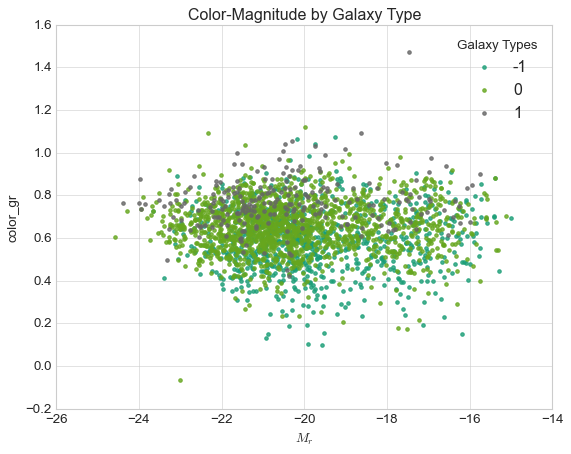

Text(0.5, 0, '$M_r$')

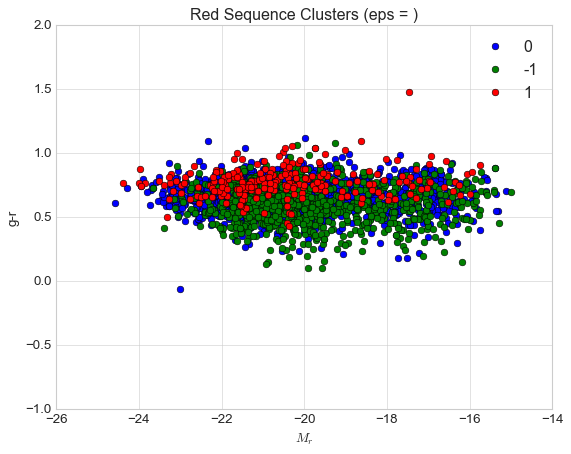

In [249]:
graficos.color_Mag_by_label(secuencia_roja, 'color_gr', label_column='Cluster_1')
plt.plot(secuencia_roja['M_r'][secuencia_roja['Cluster_1'] == 0], secuencia_roja['color_gr'][secuencia_roja['Cluster_1'] == 0], 'o', label='0')
plt.plot(secuencia_roja['M_r'][secuencia_roja['Cluster_1'] == -1], secuencia_roja['color_gr'][secuencia_roja['Cluster_1'] == -1], 'o', label='-1')
plt.plot(secuencia_roja['M_r'][secuencia_roja['Cluster_1'] == 1], secuencia_roja['color_gr'][secuencia_roja['Cluster_1'] == 1], 'o', label='1')

plt.legend()
plt.ylim(-1, 2)
plt.title('Red Sequence Clusters (eps = )')
plt.ylabel('g-r')
plt.xlabel('$M_r$')

/var/folders/0s/_xxgbjs554192y_2w2mspv3c0000gn/T/ipykernel_3142/3563478134.py:118: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


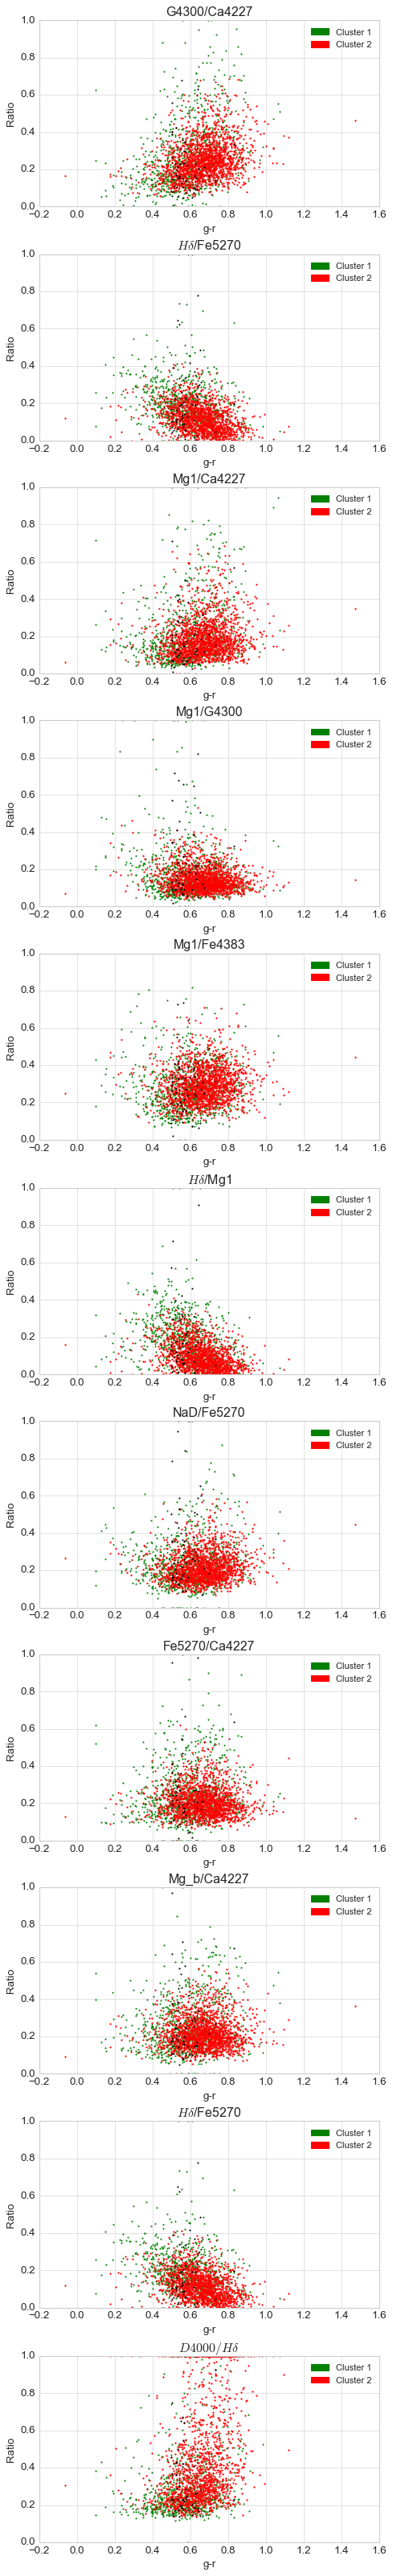

In [254]:
#### Cocientes interesantes a revisar ####
   
fig, axs = plt.subplots(11, 1, figsize=(6, 40), constrained_layout=True)  

#x = df_galaxies['color_gr'] # SN > 5
x_1 = secuencia_roja['color_gr'] # SN > 2


#axs[0].scatter(x_1, secuencia_roja['ratio_G4300/Ca4227'], s=0.8, color='greenple')
axs[0].scatter(x_1[secuencia_roja['Cluster_1']==-1], secuencia_roja['ratio_G4300/Ca4227'][secuencia_roja['Cluster_1']==-1], s=0.8, color='green')
axs[0].scatter(x_1[secuencia_roja['Cluster_1']>=0], secuencia_roja['ratio_G4300/Ca4227'][secuencia_roja['Cluster_1']>=0], s=1, color='red')
axs[0].scatter(residual_galaxies['color_gr'], residual_galaxies['ratio_G4300/Ca4227'], s=0.8, color='black')
axs[0].set_title('G4300/Ca4227')
p5, p95 = np.nanpercentile(secuencia_roja['ratio_G4300/Ca4227'], [1, 99.5])
#axs[0].set_ylim(p5 - 0.1 * (p95 - p5), p95 + 0.1 * (p95 - p5))  # Extend limits slightly

axs[0].set_ylim(0, 1)


#axs[1].scatter(x_1, secuencia_roja['ratio_Hd/Fe5270'], s=0.8, color='greenple')
axs[1].scatter(x_1[secuencia_roja['Cluster_1']==-1], secuencia_roja['ratio_Hd/Fe5270'][secuencia_roja['Cluster_1']==-1], s=0.8, color='green')
axs[1].scatter(x_1[secuencia_roja['Cluster_1']>=0], secuencia_roja['ratio_Hd/Fe5270'][secuencia_roja['Cluster_1']>=0], s=1, color='red')
axs[1].scatter(residual_galaxies['color_gr'], residual_galaxies['ratio_Hd/Fe5270'], s=0.8, color='black')
axs[1].set_title(r'$H\delta$/Fe5270')
p5, p95 = np.nanpercentile(secuencia_roja['ratio_Hd/Fe5270'], [1, 99.5])
#axs[1].set_ylim(p5 - 0.1 * (p95 - p5), p95 + 0.1 * (p95 - p5))  # Extend limits slightly

axs[1].set_ylim(0, 1)


#axs[2].scatter(x_1, secuencia_roja['ratio_Mg1/Ca4227'], s=0.8, color='greenple')
axs[2].scatter(x_1[secuencia_roja['Cluster_1']==-1], secuencia_roja['ratio_Mg1/Ca4227'][secuencia_roja['Cluster_1']==-1], s=0.8, color='green')
axs[2].scatter(x_1[secuencia_roja['Cluster_1']>=0], secuencia_roja['ratio_Mg1/Ca4227'][secuencia_roja['Cluster_1']>=0], s=1, color='red')
axs[2].scatter(residual_galaxies['color_gr'], residual_galaxies['ratio_Mg1/Ca4227'], s=0.8, color='black')
axs[2].set_title('Mg1/Ca4227')
p5, p95 = np.nanpercentile(secuencia_roja['ratio_Mg1/Ca4227'], [1, 99.5])
#axs[2].set_ylim(p5 - 0.1 * (p95 - p5), p95 + 0.1 * (p95 - p5))  # Extend limits slightly

axs[2].set_ylim(0, 1)

#axs[3].scatter(x_1, secuencia_roja['ratio_Mg1/G4300'], s=0.8, color='greenple')
axs[3].scatter(x_1[secuencia_roja['Cluster_1']==-1], secuencia_roja['ratio_Mg1/G4300'][secuencia_roja['Cluster_1']==-1], s=0.8, color='green')
axs[3].scatter(x_1[secuencia_roja['Cluster_1']>=0], secuencia_roja['ratio_Mg1/G4300'][secuencia_roja['Cluster_1']>=0], s=1, color='red')
axs[3].scatter(residual_galaxies['color_gr'], residual_galaxies['ratio_Mg1/G4300'], s=0.8, color='black')
axs[3].set_title('Mg1/G4300')
p5, p95 = np.nanpercentile(secuencia_roja['ratio_Mg1/G4300'], [1, 99.5])
#axs[3].set_ylim(p5 - 0.1 * (p95 - p5), p95 + 0.1 * (p95 - p5))  # Extend limits slightly
axs[3].set_ylim(0, 1)

#axs[4].scatter(x_1, secuencia_roja['ratio_Mg1/Fe4383'], s=0.8, color='greenple')
axs[4].scatter(x_1[secuencia_roja['Cluster_1']==-1], secuencia_roja['ratio_Mg1/Fe4383'][secuencia_roja['Cluster_1']==-1], s=0.8, color='green')
axs[4].scatter(x_1[secuencia_roja['Cluster_1']>=0], secuencia_roja['ratio_Mg1/Fe4383'][secuencia_roja['Cluster_1']>=0], s=1, color='red')
axs[4].scatter(residual_galaxies['color_gr'], residual_galaxies['ratio_Mg1/Fe4383'], s=0.8, color='black')
axs[4].set_title('Mg1/Fe4383')
p5, p95 = np.nanpercentile(secuencia_roja['ratio_Mg1/Fe4383'], [1, 99.5])
#axs[4].set_ylim(p5 - 0.1 * (p95 - p5), p95 + 0.1 * (p95 - p5))  # Extend limits slightly
axs[4].set_ylim(0, 1)

#axs[5].scatter(x_1, secuencia_roja['ratio_Hd/Mg1'], s=0.8, color='greenple')
axs[5].scatter(x_1[secuencia_roja['Cluster_1']==-1], secuencia_roja['ratio_Hd/Mg1'][secuencia_roja['Cluster_1']==-1], s=0.8, color='green')
axs[5].scatter(x_1[secuencia_roja['Cluster_1']>=0], secuencia_roja['ratio_Hd/Mg1'][secuencia_roja['Cluster_1']>=0], s=1, color='red')
axs[5].scatter(residual_galaxies['color_gr'], residual_galaxies['ratio_Hd/Mg1'], s=0.8, color='black')
axs[5].set_title(r'$H\delta$/Mg1')
p5, p95 = np.nanpercentile(secuencia_roja['ratio_Hd/Mg1'], [1, 99.5])
#axs[5].set_ylim(p5 - 0.1 * (p95 - p5), p95 + 0.1 * (p95 - p5))  # Extend limits slightly
axs[5].set_ylim(0, 1)

#axs[6].scatter(x_1, secuencia_roja['ratio_NaD/Fe5270'] , s=0.8, color='greenple')
axs[6].scatter(x_1[secuencia_roja['Cluster_1']==-1], secuencia_roja['ratio_NaD/Fe5270'][secuencia_roja['Cluster_1']==-1], s=0.8, color='green')
axs[6].scatter(x_1[secuencia_roja['Cluster_1']>=0], secuencia_roja['ratio_NaD/Fe5270'][secuencia_roja['Cluster_1']>=0], s=1, color='red')
axs[6].scatter(residual_galaxies['color_gr'], residual_galaxies['ratio_NaD/Fe5270'], s=0.8, color='black')
axs[6].set_title('NaD/Fe5270')
p5, p95 = np.nanpercentile(secuencia_roja['ratio_NaD/Fe5270'], [1, 99.5])
#axs[6].set_ylim(p5 - 0.1 * (p95 - p5), p95 + 0.1 * (p95 - p5))  # Extend limits slightly
axs[6].set_ylim(0, 1)

#axs[7].scatter(x_1, secuencia_roja['ratio_Fe5270/Ca4227'] , s=0.8, color='greenple')
axs[7].scatter(x_1[secuencia_roja['Cluster_1']==-1], secuencia_roja['ratio_Fe5270/Ca4227'][secuencia_roja['Cluster_1']==-1], s=0.8, color='green')
axs[7].scatter(x_1[secuencia_roja['Cluster_1']>=0], secuencia_roja['ratio_Fe5270/Ca4227'][secuencia_roja['Cluster_1']>=0], s=1, color='red')
axs[7].scatter(residual_galaxies['color_gr'], residual_galaxies['ratio_Fe5270/Ca4227'], s=0.8, color='black')
axs[7].set_title('Fe5270/Ca4227')
p5, p95 = np.nanpercentile(secuencia_roja['ratio_Fe5270/Ca4227'], [1, 99.5])
#axs[7].set_ylim(p5 - 0.1 * (p95 - p5), p95 + 0.1 * (p95 - p5))  # Extend limits slightly
axs[7].set_ylim(0, 1)

#axs[8].scatter(x_1, secuencia_roja['ratio_Mg_b/Ca4227'] , s=0.8, color='greenple')
axs[8].scatter(x_1[secuencia_roja['Cluster_1']==-1], secuencia_roja['ratio_Mg_b/Ca4227'][secuencia_roja['Cluster_1']==-1], s=0.8, color='green')
axs[8].scatter(x_1[secuencia_roja['Cluster_1']>=0], secuencia_roja['ratio_Mg_b/Ca4227'][secuencia_roja['Cluster_1']>=0], s=1, color='red')
axs[8].scatter(residual_galaxies['color_gr'], residual_galaxies['ratio_Mg_b/Ca4227'], s=0.8, color='black')
axs[8].set_title('Mg_b/Ca4227')
p5, p95 = np.nanpercentile(secuencia_roja['ratio_Mg_b/Ca4227'], [1, 99.5])
#axs[8].set_ylim(p5 - 0.1 * (p95 - p5), p95 + 0.1 * (p95 - p5))  # Extend limits slightly
axs[8].set_ylim(0, 1)

#axs[9].scatter(x_1, secuencia_roja['ratio_Hd/Fe5270'] , s=0.8, color='greenple')
axs[9].scatter(x_1[secuencia_roja['Cluster_1']==-1], secuencia_roja['ratio_Hd/Fe5270'][secuencia_roja['Cluster_1']==-1], s=0.8, color='green')
axs[9].scatter(x_1[secuencia_roja['Cluster_1']>=0], secuencia_roja['ratio_Hd/Fe5270'][secuencia_roja['Cluster_1']>=0], s=1, color='red')
axs[9].scatter(residual_galaxies['color_gr'], residual_galaxies['ratio_Hd/Fe5270'], s=0.8, color='black')
axs[9].set_title(r'$H\delta$/Fe5270')
p5, p95 = np.nanpercentile(secuencia_roja['ratio_Hd/Fe5270'], [1, 99.5])
#axs[9].set_ylim(p5 - 0.1 * (p95 - p5), p95 + 0.1 * (p95 - p5))  # Extend limits slightly
axs[9].set_ylim(0, 1)

#axs[10].scatter(x_1, secuencia_roja['ratio_D4000/Hd'] , s=0.8, color='greenple')
axs[10].scatter(x_1[secuencia_roja['Cluster_1']==-1], secuencia_roja['ratio_D4000/Hd'][secuencia_roja['Cluster_1']==-1], s=0.8, color='green')
axs[10].scatter(x_1[secuencia_roja['Cluster_1']>=0], secuencia_roja['ratio_D4000/Hd'][secuencia_roja['Cluster_1']>=0], s=1, color='red')
axs[10].scatter(residual_galaxies['color_gr'], residual_galaxies['ratio_D4000/Hd'], s=0.8, color='black')
axs[10].set_title(r'$D4000/H\delta$')
p5, p95 = np.nanpercentile(secuencia_roja['ratio_D4000/Hd'], [1, 99.5])
#axs[10].set_ylim(p5 - 0.1 * (p95 - p5), p95 + 0.1 * (p95 - p5))  # Extend limits slightly
axs[10].set_ylim(0, 1)


for ax in axs:
    ax.set_xlabel('g-r')
    ax.set_ylabel('Ratio')

plt.style.use('seaborn-whitegrid')
legend_handles = [mpatches.Patch(color='green', label='Cluster 1'),
                  mpatches.Patch(color='red', label='Cluster 2')]

for ax in axs:
    ax.set_xlabel('g-r')
    ax.set_ylabel('Ratio')
    ax.legend(handles=legend_handles, loc='upper right', prop={'size': 10})

plt.show()

# Gaussian Mixtures

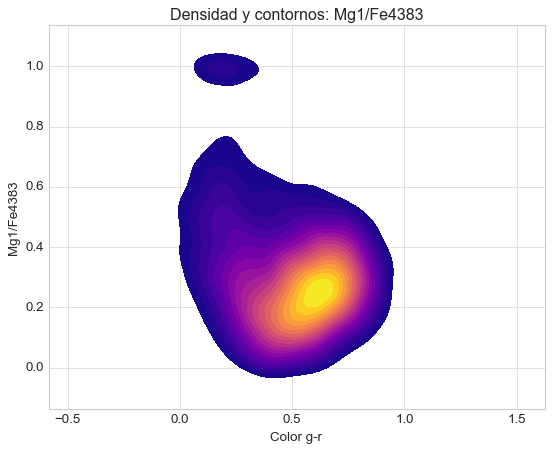

In [171]:
x_1 = df_galaxies_SN2_normalized['color_gr']  # Color (x-axis)
y = df_galaxies_SN2_normalized['ratio_Mg1/Fe4383']  # Ratio (y-axis)

plt.figure(figsize=(8, 6))
sns.kdeplot(x=x_1[df_galaxies_SN2_normalized['ratio_Mg1/Fe4383']>0], y=y[df_galaxies_SN2_normalized['ratio_Mg1/Fe4383']>0], cmap="plasma", fill=True, levels=20, thresh=0.1)

plt.title('Densidad y contornos: Mg1/Fe4383')
plt.xlabel('Color g-r')
plt.ylabel('Mg1/Fe4383')
#plt.ylim(0,1)
plt.show()

In [183]:
### Funciones para la graficación ###

from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=0.5, cmap='inferno', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=0.5, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

In [185]:
from scipy.stats import gaussian_kde